# **Analysis of Childcare Costs in Relation to Family Income and Employment Data**

**Prepared by:** Matthew Walker, Neysha Pagán Vargas

**Date:** Decmber 15, 2024

## **INTRODUCTION**
Childcare costs have become a critical concern for families across various income levels, impacting financial stability and employment decisions. This project, Analysis of Childcare Costs in Relation to Family Income and Employment Data, aims to explore the intricate relationships between childcare expenses, family income, and employment dynamics. By developing a robust data engineering pipeline, the project seeks to provide actionable insights into how childcare affordability varies across demographics, geographic regions, and employment statuses.

The primary goal of this project is to assess how childcare costs influence financial stability and employment opportunities, especially for women in the workforce. Using a combination of static datasets and API-sourced data, the project will build a scalable and efficient data processing system that ensures data accuracy and accessibility. The analysis will focus on key metrics, including childcare affordability as a percentage of family income, regional disparities, and correlations between employment rates and childcare burdens.

The project explores multiple database approaches to ensure optimal data storage, retrieval, and analysis. While MongoDB is utilized for its flexibility and scalability in handling semi-structured data, Cassandra is considered for its high availability and write performance across distributed environments, making it suitable for large-scale, geographically dispersed data. Additionally, Elasticsearch is included as an alternative for its full-text search capabilities and fast querying, enabling advanced data exploration and trend analysis.

This notebook will guide users through the development and implementation of the data pipeline, utilizing tools like PySpark for data transformation, MinIO for object storage, and various database technologies (MongoDB, Cassandra, and Elasticsearch) for data querying and analysis. Visualizations generated in Jupyter Notebooks and Kibana will provide a clear depiction of trends and correlations, enabling stakeholders to understand the challenges and opportunities in childcare affordability.

By combining data engineering best practices with detailed analysis and a diversified database approach, this project aims to uncover meaningful insights and inform policy recommendations for making childcare more accessible and equitable.

## **PROJECT OVERVIEW**

This project aims to develop a data engineering pipeline to ingest, process, and analyze data on childcare costs alongside employment and family income data. The objective is to assess how childcare costs impact family financial stability, focusing on factors such as employment rates, income distribution, and affordability of childcare across different states and counties. This proposal will outline the key datasets, potential analyses, and the data engineering methodologies involved in constructing an effective data pipeline.

### **Dataset Descriptions** 
#### All data is from 2018

1. **Childcare Prices as a Share of Median Family Income**
   - **Source**: Department of Labor (DOL)
   - **URL**: [Median Family Income by Age and Care Setting](https://www.dol.gov/agencies/wb/topics/childcare/median-family-income-by-age-care-setting)
   - **Description**:
     - Provides data on childcare costs for different care settings (center-based and home-based) and age groups (infant, toddler, preschool, and school-age).
     - Includes county-level information on childcare prices as a share of median family income.
    - **Key variables**:
       - Care settings (e.g., center-based, home-based)
       - Age groups
       - Median family income
       - Percentage of income spent on childcare.

2. **Labor Force Statistics: Employment and Earnings**
   - **Source**: Bureau of Labor Statistics (BLS)
   - **URL**: [CPS Annual Averages for 2018](https://www.bls.gov/cps/cpsa2018.htm)
   - **Dataset Name**: *8. Employed and unemployed full- and part-time workers by age, sex, race, and Hispanic or Latino ethnicity*
   - **Description**:
     - Provides detailed labor force statistics, focusing on employment rates and earnings.
     - **Worksheets used**:
       - CPSAAT08: Employed and unemployed full- and part-time workers by age, sex, race, and Hispanic or Latino ethnicity .
    - **Key variables**:
       - Employment status (full-time, part-time)
       - Median wages
       - Demographic breakdowns (age, gender, and occupation).

3. **Median Family Income Data**
   - **Source**: National Center for Education Statistics (NCES)
   - **URL**: [Median Income by State](https://nces.ed.gov/programs/digest/d22/tables/dt22_102.30.asp?current=yes)
   - **Description**:
     - Contains state-level averages for median family income.
     - Similar to the DOL dataset but aggregated at the state level, losing granularity at the county level.
     - Potential redundancy, as it mirrors data from the DOL.


## **Techniques and Methodologies**

This project prioritizes the development and implementation of robust data engineering practices to handle and process large-scale datasets related to childcare costs, family income, and employment statistics. The emphasis is on building a scalable and efficient pipeline that ensures data accuracy, reliability, and readiness for analysis. While some visualizations will be included to summarize results, the primary focus is to demonstrate the end-to-end data engineering process. Below is a detailed outline of the techniques and methodologies employed:

#### 1. Data Ingestion
- **Sources**:
  - CSV and Excel files from Department of Labor (DOL), US Census Bureau (USCB), and National Center for Education Statistics (NCES).
  - Worksheet (CPSAAT08) from the Bureau of Labor Statistics (BLS).
- **Tools**:
  - **MinIO Object Storage**:
    - Used to store raw files in an organized manner.
    - Files are partitioned by source and year for efficient retrieval.
  - **PySpark**:
    - Reads and ingests datasets into Spark DataFrames for distributed processing.

#### 2. Data Preprocessing
- **Handling Missing and Inconsistent Data**:
  - Impute missing values where applicable.
  - Remove or standardize invalid entries.
- **Standardization**:
  - Ensure consistent formats for numeric fields (e.g., median income, childcare costs).
  - Standardize categorical fields (e.g., state names, care settings).
- **Schema Validation**:
  - Use schema enforcement during data ingestion to validate data types and structures.
  - Reject invalid rows and log issues for auditability.

#### 3. Data Transformation
- **ETL Pipeline**:
  - **Extract**:
    - Load raw datasets from MinIO into PySpark DataFrames.
  - **Transform**:
    - Join datasets on common fields (e.g., state, county, year).
    - Compute derived metrics such as:
      - Childcare costs as a percentage of median family income.
      - Employment rates correlated with childcare affordability.
    - Aggregate data to state and county levels for comparison.
  - **Load**:
    - Save the cleaned and transformed data into partitioned collections in MongoDB, Cassandra, and Elasticsearch.
- **Feature Engineering**:
  - Create additional columns for demographic aggregations and geographic comparisons.
  - Calculate trends over time to support historical analysis.

#### 4. Data Storage
- **Databases Used**:
  - **Cassandra**:
    - For scalable, high-availability storage of structured data.
    - Supports efficient querying for region-specific and demographic analyses.
  - **MongoDB**:
    - To handle semi-structured data, such as demographic and childcare details.
    - Allows flexible querying of nested fields for detailed insights.
  - **Elasticsearch**:
    - Provides fast querying capabilities for text-based data exploration and search-driven analysis.
- **Partitioning**:
  - Data is partitioned by region (state, county) and year to optimize storage and retrieval performance.

#### 5. Visualization
- **Purpose**:
  - To verify data transformations and provide summaries of key metrics.
- **Tools**:
  - **Matplotlib and Plotly**:
    - Create visualizations such as:
      - Geographic distributions of childcare costs as a percentage of income.
      - Correlations between employment rates and childcare costs.
      - Trend lines for historical comparisons.
- **Scope**:
  - Minimal visualizations, primarily used to validate the results of the pipeline and illustrate key findings.

### Outcome
The project will produce a reliable, scalable data engineering pipeline that ingests, cleans, and transforms datasets into a unified, queryable format. By focusing on data engineering, the project ensures that the data is ready for downstream applications, including policy analysis, detailed reporting, and decision-making. Visualizations serve as supplementary outputs, while the primary deliverable is the robust infrastructure built to process and manage complex datasets.


## **LIBRARIES**

In [1]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q cassandra-driver

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import os
import subprocess
from urllib.request import Request, urlopen, urlretrieve  
from urllib.error import HTTPError

# install if needed: pip install boto3 , openpyxl
import boto3
from openpyxl import load_workbook
from pyspark.sql.functions import lit
import pandas as pd
from IPython.display import display
import re
from pyspark.sql.functions import col
import json
from cassandra.cluster import Cluster

## **USER DEFINED FUNCTIONS**

In [5]:
# 1. Function to sanitize a single column name
def sanitize_column(name):
    """
    Sanitizes a column name by replacing special characters and standardizing the format.
    - Replaces '%' with '_percent' and '$' with '_dollar'.
    - Converts spaces and special characters into underscores.
    - Strips leading/trailing underscores and converts to lowercase.
    """
    # Replace '%' and '$' with meaningful labels
    name = name.replace('%', '_percent')
    name = name.replace('$', '_dollar')
    # Replace special characters with underscores
    name = re.sub(r'[^\w\s]', '_', name)  # Retain alphanumeric and spaces
    # Replace spaces with underscores and collapse multiple underscores
    name = re.sub(r'\s+', '_', name)
    name = re.sub(r'_+', '_', name)
    # Remove leading/trailing underscores and convert to lowercase
    return name.strip('_').lower()

# 2. Function to apply sanitization to all columns in a DataFrame
def sanitize_dataframe_columns(dataframe):
    """
    Sanitizes all column names in a Pandas DataFrame.
    """
    sanitized_columns = [sanitize_column(col) for col in dataframe.columns]
    dataframe.columns = sanitized_columns
    return dataframe

## **PART I: Data Ingestion**

The datasets for this project are retrieved directly from publicly available sources, including government and organizational websites. Each dataset is downloaded programmatically or manually (if necessary) from its respective source link. The data files are then stored locally before being uploaded to MinIO, which serves as the centralized storage solution for this project.

#### **MINIO Storage**

MinIO is used as the landing storage for all data sources. 
 - Connect to MinIO from Jupyter Terminal

    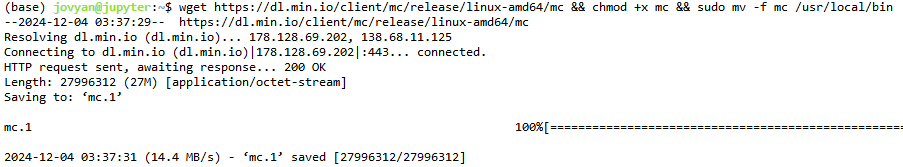

 - Create new bucket for the project
 
     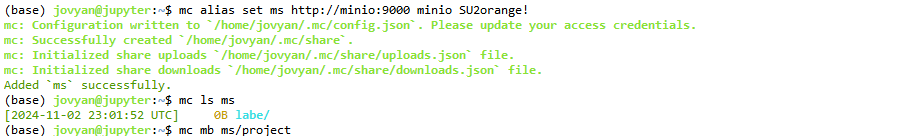
     
 - Verify new bucket
 
     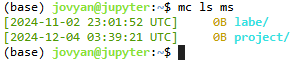
 
  - Download the datasets and upload them to MinIO

In [ ]:
# Define dataset URLs and filenames
datasets = [
    ("https://nces.ed.gov/programs/digest/d22/tables/xls/tabn102.30.xlsx", "tabn102.30.xlsx"),
    ("https://www.dol.gov/sites/dolgov/files/WB/NDCP/Childcare-Prices-by-Age-Children-Care-Setting-Data-Table-2023.xlsx", "Childcare-Prices-2023.xlsx"),
    ("https://www.bls.gov/cps/aa2018/cpsaat08.xlsx", "cpsaat08.xlsx"),
]

# Manual download files
manual_files = [
    ("https://data.census.gov/table/ACSST1Y2018.S2002?t=Income%20and%20Poverty&g=010XX00US,$0400000&y=2018", 
     "ACSST1Y2018.S2002-2024-11-10T090744.csv")
]

# Directory to store downloaded files
download_dir = "datasets"
os.makedirs(download_dir, exist_ok=True)

# Download datasets
print("Downloading datasets...")
for url, filename in datasets:
    local_path = os.path.join(download_dir, filename)
    if not os.path.exists(local_path):
        try:
            # Set headers
            req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})  # Use direct import of Request
            with urlopen(req) as response, open(local_path, 'wb') as out_file:  # Use direct import of urlopen
                out_file.write(response.read())
            print(f"Downloaded: {filename}")
        except HTTPError as e:
            print(f"Failed to download {filename}: {e}. Please download it manually.")
    else:
        print(f"Already exists: {filename}")

# Manual download notification
print("\nManual download required for the following files:")
for _, filename in manual_files:
    print(f"- {filename}. Please place it in {download_dir}.")

# Configure MinIO
minio_alias = "ms"
minio_bucket = "project"

# Set MinIO alias
print("\nConfiguring MinIO...")
subprocess.run(
    ["mc", "alias", "set", minio_alias, "http://minio:9000", "minio", "SU2orange!"],
    check=True
)

# Upload datasets to MinIO
print("\nUploading datasets to MinIO bucket 'project'...")
all_files = datasets + manual_files
for _, filename in all_files:
    local_path = os.path.join(download_dir, filename)
    if os.path.exists(local_path):  # Check if the file exists
        try:
            subprocess.run(
                ["mc", "cp", local_path, f"{minio_alias}/{minio_bucket}/"],
                check=True,
            )
            print(f"Uploaded: {filename}")
        except subprocess.CalledProcessError as e:
            print(f"Failed to upload {filename}: {e}")
    else:
        print(f"File not found: {filename}. Skipping upload.")

print("\nProcess completed!")


---
#### **Note**
The following files could not be downloaded programmatically due to access restrictions (HTTP Error 403) and had to be downloaded manually:

1. `cpsaat08.xlsx` from the Bureau of Labor Statistics (BLS)
   - URL: [BLS CPSAAT08 File](https://www.bls.gov/cps/aa2018/cpsaat08.xlsx)
2. `ACSST1Y2018.S2002-2024-11-10T090744.csv` from the U.S. Census Bureau
   - URL: [Census Data](https://data.census.gov/table/ACSST1Y2018.S2002?t=Income%20and%20Poverty&g=010XX00US,$0400000&y=2018)

To ensure proper processing:
1. Visit the respective URLs and download the files manually.
2. Move the files into the directory `/home/jovyan/datasets`.

Once the files are in the correct directory, they will be included in subsequent data uploads to the MinIO bucket.

---

- Verify the datasets in the bucket through MinIO webconsole

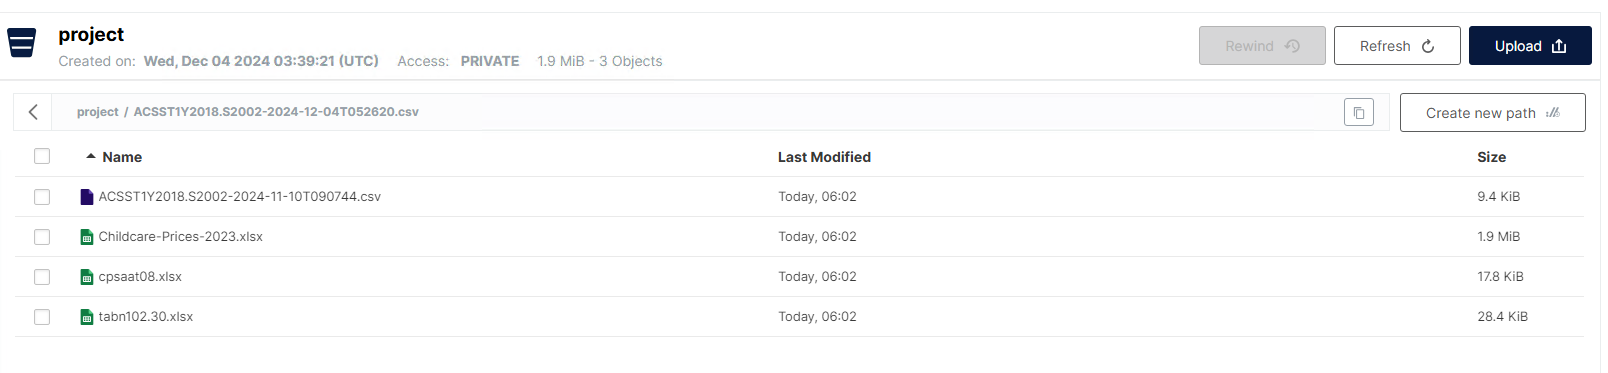

----
## **Dataset #1: Childcare Prices as a Share of Median Family Income**

#### **Problem Statement**

The "Childcare Prices as a Share of Median Family Income" dataset contains detailed information on childcare costs across various U.S. states and counties. However, the dataset requires significant preprocessing to address missing values, ensure consistent column naming, and prepare it for efficient storage and querying. Without these preprocessing steps, the dataset would be prone to errors and challenging to analyze effectively, limiting its usability for decision-making and analytics.

#### **Data Processing**
- **Handle Missing Values:**
    - Identify columns with missing values and replace them with zero to maintain numeric consistency for calculations and analytics.
    
- **Standardize Column Names:**
    - Sanitize column names by removing problematic characters (spaces, special symbols) while retaining meaningful information, such as $ for dollar values and % for percentages.
    - Apply a consistent naming format (e.g., snake_case) for easier querying and analytics.
    
- **Validate Data Consistency:**
    - Group data by states (Reference_SheetName) and ensure proper counts for each category.
    - Ensure data completeness and accuracy of data across rows and columns.
    
- **Prepare Data for Querying:**
    - Clean numeric columns to eliminate invalid values.
    - Create an optimized, structured dataset ready for database insertion.

#### **Data Storage**

***Cassandra*** is chosen as the preferred storage solution due to the follwing advantages:

- **High Scalability:** Cassandra can handle large datasets efficiently, which is ideal for storing multi-state and multi-county data across the U.S.
- **Distributed Data Model:** Its distributed architecture ensures quick access and querying, even for geographically distributed analytics
- **Efficient Querying:** The schema can be designed with partition keys (e.g., State, County) to enable fast retrieval of state or county-level information.
- **Write-Optimized:** Cassandra is optimized for write-heavy operations, making it suitable for inserting large volumes of cleaned data.
- **Denormalized Data:** Cassandra’s table structure aligns well with flattened, denormalized data, where all relevant information can be queried from a single table.
----

**Note:** Childcare prices are derived from each state's childcare Market Rate Survey. Prices are median yearly prices for one child at the market rate. School-age prices reflect the school-year arrangement (part day). Childcare prices are based on the 2016-2018 data collection cycle and are presented in 2018 and 2023 real dollars using the CPI-U for child care (day care and preschool in the U.S. city average). Economic and demographic data are obtained from the 2014-2018 American Community Survey to correspond to the 2016-2018 childcare price data.

----


### **PART I: Ingest data from MinIO into pySpark dataframe**

The following script automates the process of downloading an Excel file from a MinIO object storage bucket, reading all its sheets, and consolidating them into a single Spark DataFrame. Each sheet is processed individually, with its name added as a Reference_SheetName column to distinguish records from different sheets. The resulting unified DataFrame is well-suited for further analysis and transformation in Spark. 

While an optional step to save this data in Parquet format is included—highlighting its benefits such as efficient storage, faster retrieval, and optimized query performance in big data environments—this project will not utilize Parquet files. However, this approach is commonly applied in professional, work-related scenarios where performance and scalability are critical.

In [47]:
# MinIO Configuration
s3_url = "http://minio:9000"
s3_key = "minio"
s3_secret = "SU2orange!"
s3_bucket = "project"
s3_file_key = "Childcare-Prices-2023.xlsx"

# Initialize MinIO client
s3 = boto3.client('s3',
                  endpoint_url=s3_url,
                  aws_access_key_id=s3_key,
                  aws_secret_access_key=s3_secret)

# Download Excel file locally from MinIO
local_file = "/tmp/Childcare-Prices-2023.xlsx"
s3.download_file(s3_bucket, s3_file_key, local_file)

# Read sheet names using pandas
sheet_names = pd.ExcelFile(local_file).sheet_names
print("Sheets in the Excel file:", sheet_names)

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("ExcelSheetsAnalysis") \
    .config("spark.sql.debug.maxToStringFields", "100") \
    .getOrCreate()

# Process each sheet and add to a unified DataFrame
final_df = None

for sheet in sheet_names:
    try:
        print(f"Loading sheet: {sheet}")
        # Read the sheet using pandas
        pandas_df = pd.read_excel(local_file, sheet_name=sheet)
        
        # Add the State_Name column
        pandas_df['Reference_SheetName'] = sheet
        
        # Convert pandas DataFrame to Spark DataFrame
        spark_df = spark.createDataFrame(pandas_df)
        
        # Combine DataFrames
        if final_df is None:
            final_df = spark_df
        else:
            final_df = final_df.unionByName(spark_df)
        
        print(f"Loaded sheet '{sheet}' with {spark_df.count()} rows and {len(spark_df.columns)} columns.")
    except Exception as e:
        print(f"Failed to load sheet '{sheet}': {e}")

# Show the combined DataFrame
if final_df:
    print("Combined DataFrame:")
    #final_df.show()
    final_df.printSchema()
else:
    print("No data was successfully loaded.")


Sheets in the Excel file: ['AllStates', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'DistrictOfColumbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']
Loading sheet: AllStates
Loaded sheet 'AllStates' with 3142 rows and 37 columns.
Loading sheet: Alabama
Loaded sheet 'Alabama' with 67 rows and 37 columns.
Loading sheet: Alaska
Loaded sheet 'Alaska' with 29 rows and 37 columns.
Loading sheet: Arizona
Loaded sheet 'Arizona' with 15 rows and 37 columns.
Loading sheet: Arkansa

In [ ]:
# Converting dataframe to Pandas
childcare_df = final_df.toPandas()

### **PART II: Dataset Preprocessing, Transformation, and Storage**

This will include cleaning data, handling missing values, We'll ensure the data quality and integrity are maintained to ensure reliable analysis.

**Description**
This code performs several essential data exploration and preprocessing tasks on the DataFrames.


**Purpose**
To gather comprehensive information about the DataFrame's structure, statistical summary, and data quality, which is crucial for effective data analysis and preprocessing.

### Get Shape and Unique Values

In [50]:
# Check unique values in the Reference_SheetName
print(childcare_df['Reference_SheetName'].unique())
print(" ")

# Group by 'Reference_SheetName' and count rows
row_counts = childcare_df.groupby('Reference_SheetName').size().reset_index(name='Total_Rows')

# Sort the results by 'Total_Rows' in descending order
row_counts = row_counts.sort_values(by='Total_Rows', ascending=False)

# Display the result
print(row_counts)

# Get Data Frame shape
#print(f"DataFrame shape: {childcare_df.shape}")
print(" ")

# Display DataFrame info
childcare_df.info()


['AllStates' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'DistrictOfColumbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'NewHampshire' 'NewJersey' 'NewMexico' 'NewYork' 'NorthCarolina'
 'NorthDakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'RhodeIsland'
 'SouthCarolina' 'SouthDakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'WestVirginia' 'Wisconsin' 'Wyoming']
 
   Reference_SheetName  Total_Rows
2            AllStates        3142
44               Texas         254
11             Georgia         159
47            Virginia         133
18            Kentucky         120
26            Missouri         115
17              Kansas         105
14            Illinois         102
34       NorthCarolina         100
16                Iowa          99
43      

### Get summary statistics

In [51]:
# Get summary statistics for the DataFrame
print("\nSummary Statistics:")
childcare_df.describe()


Summary Statistics:


County FIPS code  Infant center-based price: 2018 ($)  \
count       6284.000000                          5636.000000   
mean       30383.649268                          8241.184469   
std        15161.301696                          2880.559603   
min         1001.000000                          1441.960000   
25%        18177.000000                          6487.000000   
50%        29176.000000                          7800.000000   
75%        45081.000000                          9360.000000   
max        56045.000000                         24440.000000   

       Infant center-based price: 2023 (estimated) ($)  \
count                                      5636.000000   
mean                                       9700.303909   
std                                        3390.568878   
min                                        1697.262120   
25%                                        7635.537306   
50%                                        9181.006781   
75%                                       11017.208137   
max                                       28767.154581   

       Infant center-based price as share of family income: 2018 (%)  \
count                                        5636.000000               
mean                                           12.910712               
std                                             3.209779               
min                                             2.422200               
25%                                            10.810312               
50%                                            12.704673               
75%                                            14.608065               
max                                            47.003046               

       Infant home-based price: 2018 ($)  \
count                        5596.000000   
mean                         6390.337971   
std                          1828.062093   
min                          2478.320000   
25%                          5105.333220   
50%                          5999.760000   
75%                          7331.480000   
max                         22408.880000   

       Infant home-based price: 2023 (estimated) ($)  \
count                                    5596.000000   
mean                                     7521.761058   
std                                      2151.724419   
min                                      2917.111888   
25%                                      6009.243450   
50%                                      7062.030416   
75%                                      8629.534307   
max                                     26376.420415   

       Infant home-based price as share of family income: 2018 (%)  \
count                                        5596.000000             
mean                                           10.145962             
std                                             2.322280             
min                                             4.608798             
25%                                             8.627784             
50%                                             9.939216             
75%                                            11.424713             
max                                            23.361513             

       Toddler center-based price: 2018 ($)  \
count                           5636.000000   
mean                            7454.270260   
std                             2363.327871   
min                             1120.080000   
25%                             5982.599917   
50%                             7163.000000   
75%                             8320.000000   
max                            21788.000000   

       Toddler center-based price: 2023 (estimated) ($)  \
count                                       5636.000000   
mean                                        8774.064847   
std                                         2781.760155   
min                                         1318.392574   
25%   

### Check Null values


In [52]:
# Check for missing values in the DataFrame
print("\nMissing Values:")
childcare_df.isnull().sum()


Missing Values:


State name                                                             0
County name                                                            0
County FIPS code                                                       0
Infant center-based price: 2018 ($)                                  648
Infant center-based price: 2023 (estimated) ($)                      648
Infant center-based price as share of family income: 2018 (%)        648
Infant home-based price: 2018 ($)                                    688
Infant home-based price: 2023 (estimated) ($)                        688
Infant home-based price as share of family income: 2018 (%)          688
Toddler center-based price: 2018 ($)                                 648
Toddler center-based price: 2023 (estimated) ($)                     648
Toddler center-based price as share of family income: 2018 (%)       648
Toddler home-based price: 2018 ($)                                   688
Toddler home-based price: 2023 (estimated) ($)     

In [53]:
# Check for missing values in the Pandas DataFrame
missing_values = childcare_df.isnull().sum()

# Filter columns with null values
columns_with_nulls = missing_values[missing_values > 0].index.tolist()

# Check for null values grouped by 'Reference_SheetName'
null_summary = childcare_df.groupby('Reference_SheetName').apply(
    lambda group: group[columns_with_nulls].isnull().sum()
)

# Filter only rows where null values exist
null_summary = null_summary.loc[:, (null_summary > 0).any()]

# Set Pandas display options to show all rows
pd.set_option('display.max_rows', len(null_summary))
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Display the DataFrame as a table 
display(null_summary)

# Optionally reset display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

Infant center-based price: 2018 ($)  Infant center-based price: 2023 (estimated) ($)  Infant center-based price as share of family income: 2018 (%)  Infant home-based price: 2018 ($)  Infant home-based price: 2023 (estimated) ($)  Infant home-based price as share of family income: 2018 (%)  Toddler center-based price: 2018 ($)  Toddler center-based price: 2023 (estimated) ($)  Toddler center-based price as share of family income: 2018 (%)  Toddler home-based price: 2018 ($)  Toddler home-based price: 2023 (estimated) ($)  Toddler home-based price as share of family income: 2018 (%)  Preschool center-based price: 2018 ($)  Preschool center-based price: 2023 (estimated) ($)  Preschool center-based price as share of family income: 2018 (%)  Preschool home-based price: 2018 ($)  Preschool home-based price: 2023 (estimated) ($)  Preschool home-based price as share of family income: 2018 (%)  School-age center-based price: 2018 ($)  \
Reference_SheetName                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Alabama                                                0                                                0                                                  0                                              0                                              0                                                  0                                               0                                                 0                                                  0                                                0                                               0                                                  0                                                  0                                                  0                                                   0                                                    0                                                 0                                                  0                                                     0   
Alaska                                                22                                               22                                                 22                                             28                                             28                                                 28                                              22                                                22                                                 22                                               28                                              28                                                 28                                                 22                                                 22                                                  22                                                   28                                                28                                                 28                                                    22   
AllStates                                            324                                              324                                                324         

 
### Handling Missing Values
This script creates a clean version of the childcare dataset by replacing all missing values in columns with 0. It ensures the data is ready for analysis by handling null values in numerical columns, which could otherwise disrupt calculations or visualizations. The original dataset remains unchanged, and a new DataFrame is created for further use.

In [54]:
# Create a new DataFrame to preserve the original data
cleaned_dataframe = childcare_df.copy()

# Replace missing values with 0 for all columns that contain missing values
columns_with_nulls = cleaned_dataframe.columns[cleaned_dataframe.isnull().any()] 

# Iterate through columns and replace NaN with 0
for column in columns_with_nulls:
    cleaned_dataframe[column].fillna(0, inplace=True)

# Display the updated DataFrame and confirm no nulls exist
print("Updated DataFrame with missing values replaced:")
print(cleaned_dataframe.isnull().sum())  # Check if all nulls are replaced


Updated DataFrame with missing values replaced:
State name                                                           0
County name                                                          0
County FIPS code                                                     0
Infant center-based price: 2018 ($)                                  0
Infant center-based price: 2023 (estimated) ($)                      0
Infant center-based price as share of family income: 2018 (%)        0
Infant home-based price: 2018 ($)                                    0
Infant home-based price: 2023 (estimated) ($)                        0
Infant home-based price as share of family income: 2018 (%)          0
Toddler center-based price: 2018 ($)                                 0
Toddler center-based price: 2023 (estimated) ($)                     0
Toddler center-based price as share of family income: 2018 (%)       0
Toddler home-based price: 2018 ($)                                   0
Toddler home-based price: 202

### Standardizing Column Names for Consistent and Readable Data
Standardizing column names is crucial in data preprocessing to ensure that they are descriptive, programmatically friendly, and consistent across the dataset. This process removes problematic characters, applies a uniform format, and retains key information such as dollar signs ($) and percentage signs (%) for clarity.

**Standardized column names:**

- Improve programmatic compatibility, making it easier to reference columns in scripts and queries.
- Enhance consistency, reducing potential errors caused by variations in naming conventions.
- Retain semantic meaning, ensuring column names remain informative (e.g., keeping $ and %).

The provided script automates this sanitization process, transforming column names into a uniform, clear format while retaining critical information for financial and percentage-related data.

In [55]:
# Apply the function on the `cleaned_dataframe`
cleaned_dataframe = sanitize_dataframe_columns(cleaned_dataframe)

# Display sanitized column names
print("Sanitized Column Names:")
print(cleaned_dataframe.columns)

Sanitized Column Names:
Index(['state_name', 'county_name', 'county_fips_code',
       'infant_center_based_price_2018_dollar',
       'infant_center_based_price_2023_estimated_dollar',
       'infant_center_based_price_as_share_of_family_income_2018_percent',
       'infant_home_based_price_2018_dollar',
       'infant_home_based_price_2023_estimated_dollar',
       'infant_home_based_price_as_share_of_family_income_2018_percent',
       'toddler_center_based_price_2018_dollar',
       'toddler_center_based_price_2023_estimated_dollar',
       'toddler_center_based_price_as_share_of_family_income_2018_percent',
       'toddler_home_based_price_2018_dollar',
       'toddler_home_based_price_2023_estimated_dollar',
       'toddler_home_based_price_as_share_of_family_income_2018_percent',
       'preschool_center_based_price_2018_dollar',
       'preschool_center_based_price_2023_estimated_dollar',
       'preschool_center_based_price_as_share_of_family_income_2018_percent',
       'pres

In [56]:
print(cleaned_dataframe.dtypes)

# Convert Pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(cleaned_dataframe)

# Print the schema
spark_df.printSchema()


state_name                                                               object
county_name                                                              object
county_fips_code                                                          int64
infant_center_based_price_2018_dollar                                   float64
infant_center_based_price_2023_estimated_dollar                         float64
infant_center_based_price_as_share_of_family_income_2018_percent        float64
infant_home_based_price_2018_dollar                                     float64
infant_home_based_price_2023_estimated_dollar                           float64
infant_home_based_price_as_share_of_family_income_2018_percent          float64
toddler_center_based_price_2018_dollar                                  float64
toddler_center_based_price_2023_estimated_dollar                        float64
toddler_center_based_price_as_share_of_family_income_2018_percent       float64
toddler_home_based_price_2018_dollar    

In [57]:
# Display the DataFrame
display(cleaned_dataframe)

state_name        county_name  county_fips_code  \
0       Alabama     Autauga County              1001   
1       Alabama     Baldwin County              1003   
2       Alabama     Barbour County              1005   
3       Alabama        Bibb County              1007   
4       Alabama      Blount County              1009   
...         ...                ...               ...   
6279    Wyoming  Sweetwater County             56037   
6280    Wyoming       Teton County             56039   
6281    Wyoming       Uinta County             56041   
6282    Wyoming    Washakie County             56043   
6283    Wyoming      Weston County             56045   

      infant_center_based_price_2018_dollar  \
0                                   6261.32   
1                                   6261.32   
2                                   4482.40   
3                                   5451.16   
4                                   9260.16   
...                                     ...   
6279                                7235.80   
6280                               20751.12   
6281                                5625.36   
6282                                5760.04   
6283                                6561.36   

      infant_center_based_price_2023_estimated_dollar  \
0                                         7369.900177   
1                                         7369.900177   
2                                         5276.018564   
3                                         6416.299606   
4                                        10899.691251   
...                                               ...   
6279                                      8516.913957   
6280                                     24425.150440   
6281                                      6621.342091   
6282                                      6779.867474   
6283                                      7723.062904   

      infant_center_based_price_as_share_of_family_income_2018_percent  \
0                                              8.515327                  
1                                              8.702200                  
2                                             10.109385                  
3                                              9.940117                  
4                                             15.464013                  
...                                                 ...                  
6279                                           8.524540                  
6280                                          18.763672                  
6281                                           7.962631                  
6282                                           8.643388                  
6283                                           8.695495                  

      infant_home_based_price_2018_dollar  \
0                                 5569.20   
1                                 5613.92   
2                                 4247.36   
3                                 4529.72   
4                                 5660.72   
...                                   ...   
6279                              6885.84   
6280                             22408.88   
6281                              5379.40   
6282                              5504.20   
6283                              6266.00   

      infant_home_based_price_2023_estimated_dollar  \
0                                       6555.238842   
1                                       6607.876614   
2                                       4999.364226   
3                                       5331.716671   
4                                       6662.962655   
...                                             ...   
6279                                    8104.992786   
6280                                   26376.420415   
6281                                    6331.834343   
6282                                    6478.730452   
6283                                    7375.40

In [58]:
spark_df = spark_df.withColumnRenamed("women_s_labor_force_participation_rate_percent","womens_labor_force_participation_rate_percent")
spark_df = spark_df.withColumnRenamed("women_s_median_earnings_dollar", "womens_median_earnings_dollar")
display(spark_df)

DataFrame[state_name: string, county_name: string, county_fips_code: bigint, infant_center_based_price_2018_dollar: double, infant_center_based_price_2023_estimated_dollar: double, infant_center_based_price_as_share_of_family_income_2018_percent: double, infant_home_based_price_2018_dollar: double, infant_home_based_price_2023_estimated_dollar: double, infant_home_based_price_as_share_of_family_income_2018_percent: double, toddler_center_based_price_2018_dollar: double, toddler_center_based_price_2023_estimated_dollar: double, toddler_center_based_price_as_share_of_family_income_2018_percent: double, toddler_home_based_price_2018_dollar: double, toddler_home_based_price_2023_estimated_dollar: double, toddler_home_based_price_as_share_of_family_income_2018_percent: double, preschool_center_based_price_2018_dollar: double, preschool_center_based_price_2023_estimated_dollar: double, preschool_center_based_price_as_share_of_family_income_2018_percent: double, preschool_home_based_price_201

### Storing data into Cassandra

To store the dataset efficiently in Cassandra, a Cassandra environment was initialized using Docker Compose and connected to the database using cqlsh. 
- A keyspace named childcare was created with the SimpleStrategy replication strategy and a replication factor of 1, ensuring single-node data replication for simplicity during testing. Durable writes were enabled to guarantee data persistence. 
- Within the childcare keyspace, a table named childcare_prices with a schema tailored to the dataset. The schema includes columns for state and county information, childcare pricing metrics across various age groups and years (both in dollar amounts and percentages), demographic and economic data such as median family income and racial composition, and a reference column to track the source of each record. 

This structure ensures that the data is well-organized and optimized for queries by geographic and demographic attributes.

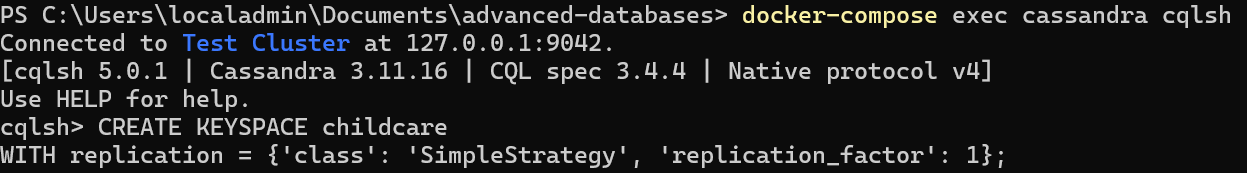

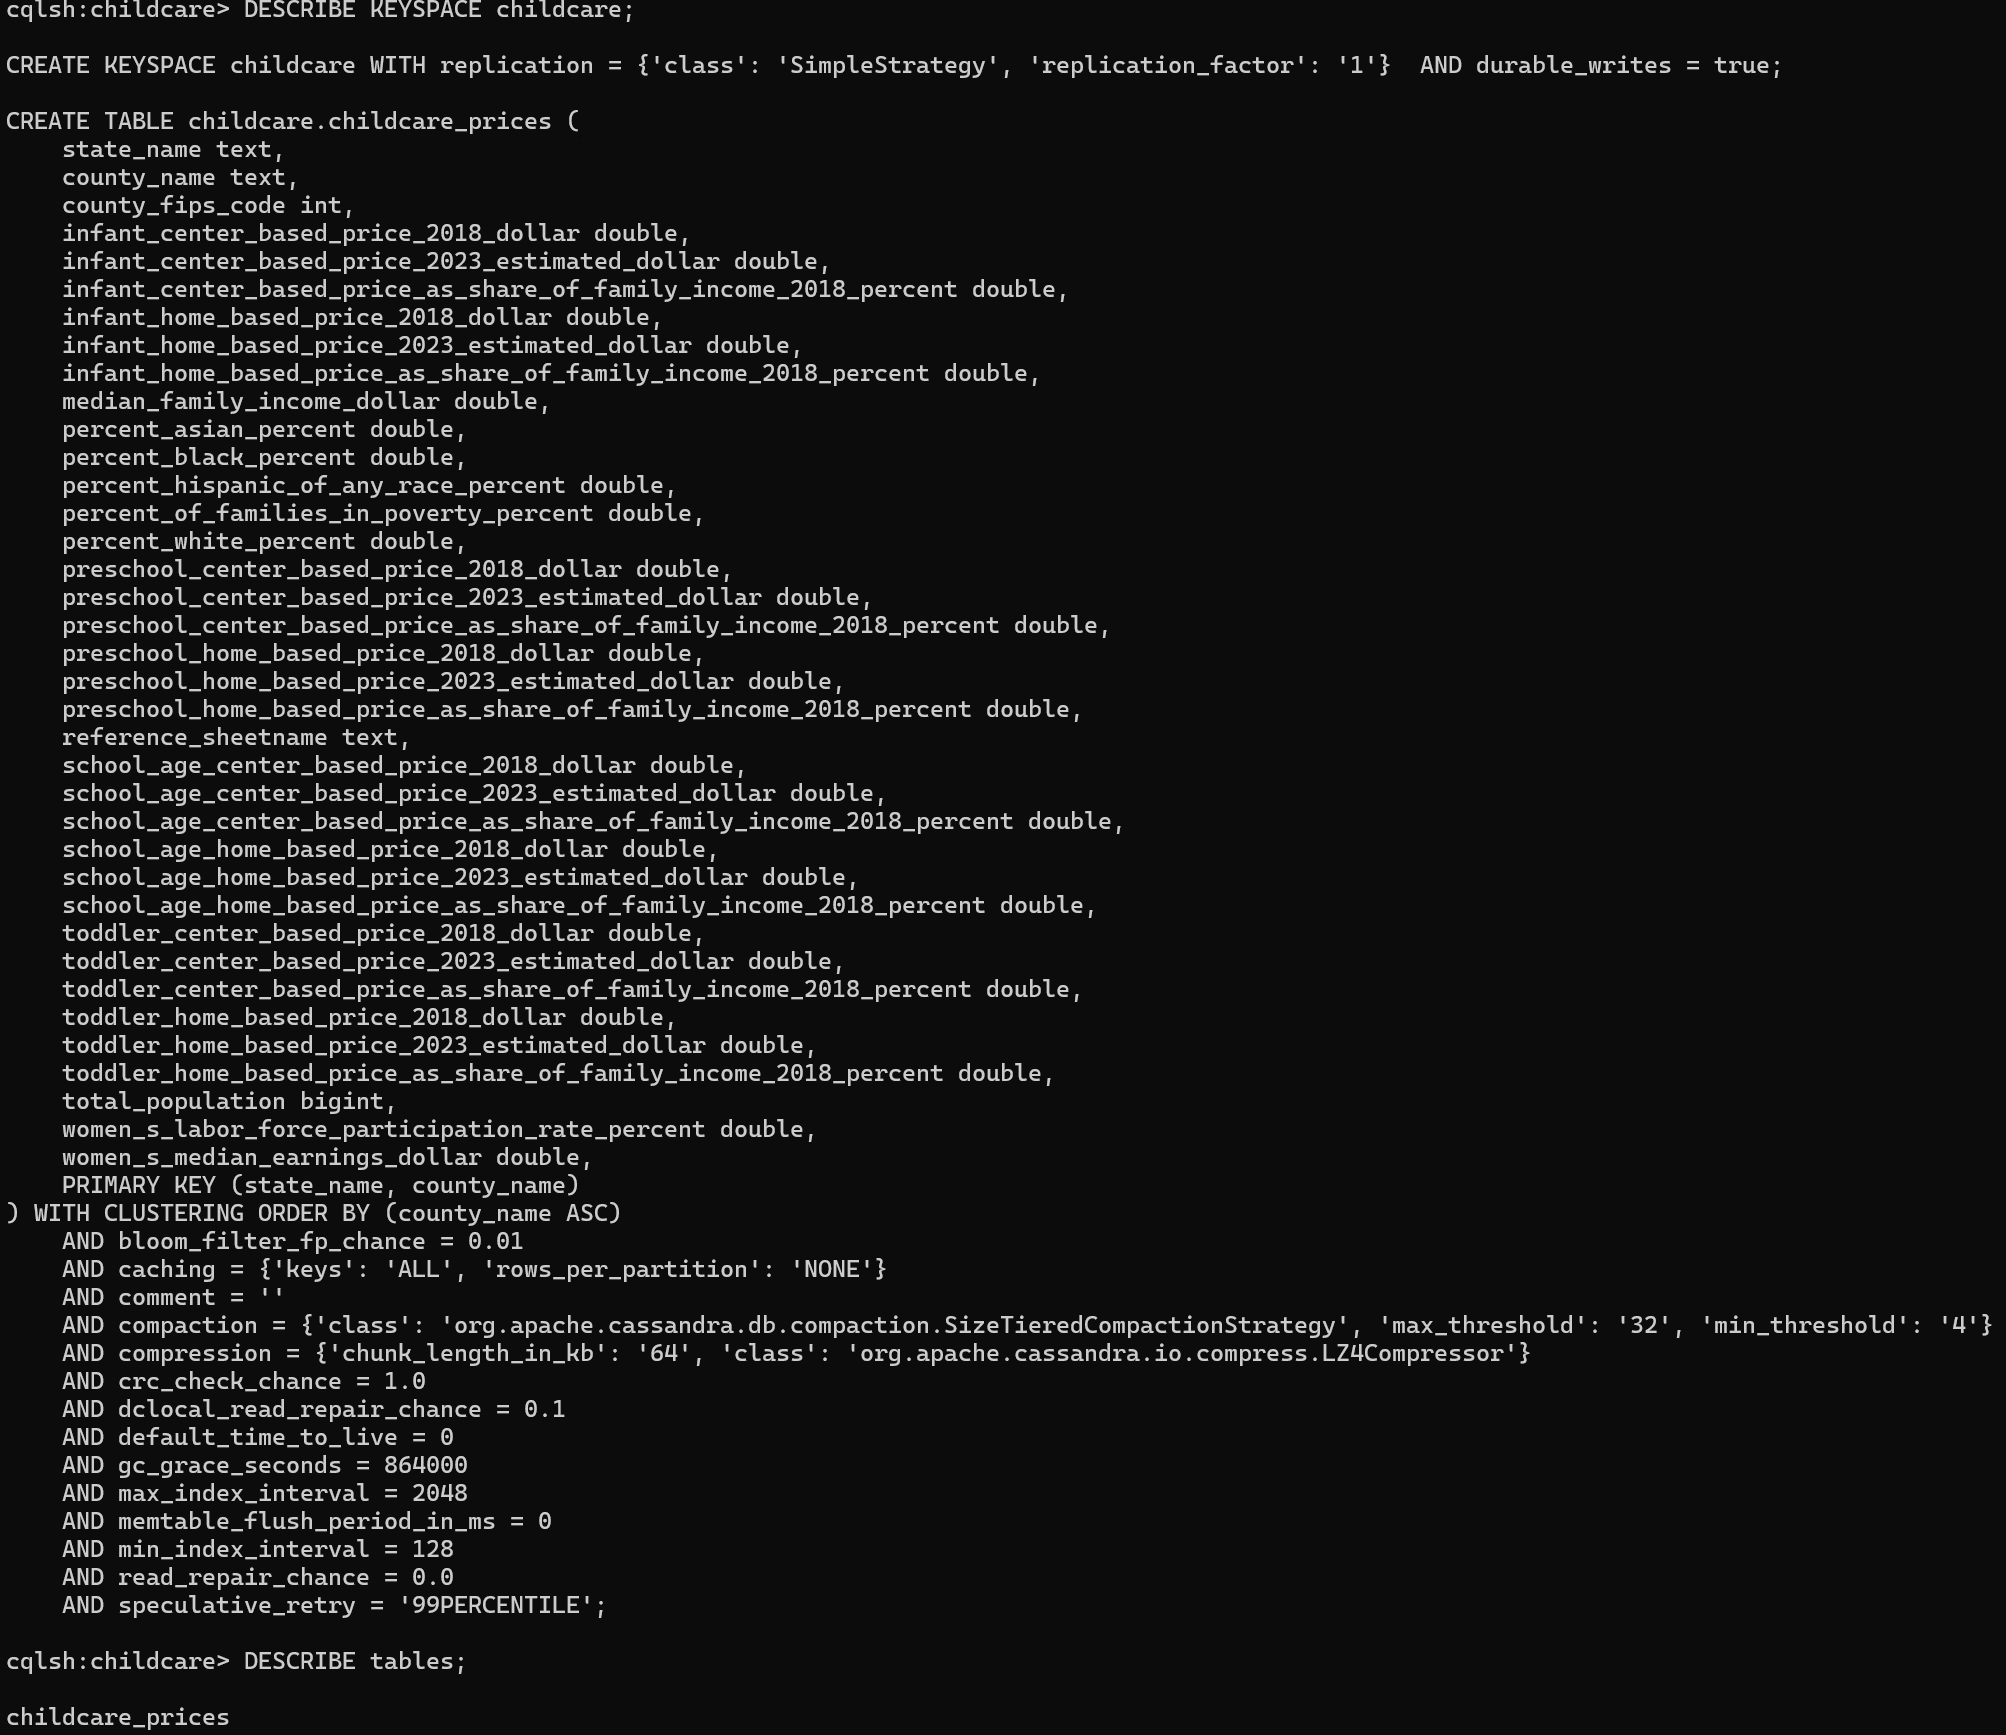


In [59]:
# CASSANDRA CONFIGURATION
cassandra_host = "cassandra"

# Spark init
spark = SparkSession.builder \
    .master("local") \
    .appName('jupyter-pyspark') \
      .config("spark.cassandra.connection.host", cassandra_host) \
      .config("spark.jars.packages","com.datastax.spark:spark-cassandra-connector-assembly_2.12:3.1.0")\
    .getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")
print(cassandra_host)

cassandra


In [60]:
# WE NEED A TABLE BEFORE WE CAN WRITE, Using Plain old Python
!pip install -q cassandra-driver
from cassandra.cluster import Cluster
with Cluster([cassandra_host]) as cluster:
    session = cluster.connect()
    session.execute("CREATE KEYSPACE IF NOT EXISTS childcare WITH replication={ 'class': 'SimpleStrategy', 'replication_factor' : 1 };")
    session.execute("""
    CREATE TABLE IF NOT EXISTS childcare.childcare_prices (
        state_name text,
        county_name text,
        county_fips_code int,
        infant_center_based_price_2018_dollar double,
        infant_center_based_price_2023_estimated_dollar double,
        infant_center_based_price_as_share_of_family_income_2018_percent double,
        infant_home_based_price_2018_dollar double,
        infant_home_based_price_2023_estimated_dollar double,
        infant_home_based_price_as_share_of_family_income_2018_percent double,
        toddler_center_based_price_2018_dollar double,
        toddler_center_based_price_2023_estimated_dollar double,
        toddler_center_based_price_as_share_of_family_income_2018_percent double,
        toddler_home_based_price_2018_dollar double,
        toddler_home_based_price_2023_estimated_dollar double,
        toddler_home_based_price_as_share_of_family_income_2018_percent double,
        preschool_center_based_price_2018_dollar double,
        preschool_center_based_price_2023_estimated_dollar double,
        preschool_center_based_price_as_share_of_family_income_2018_percent double,
        preschool_home_based_price_2018_dollar double,
        preschool_home_based_price_2023_estimated_dollar double,
        preschool_home_based_price_as_share_of_family_income_2018_percent double,
        school_age_center_based_price_2018_dollar double,
        school_age_center_based_price_2023_estimated_dollar double,
        school_age_center_based_price_as_share_of_family_income_2018_percent double,
        school_age_home_based_price_2018_dollar double,
        school_age_home_based_price_2023_estimated_dollar double,
        school_age_home_based_price_as_share_of_family_income_2018_percent double,
        womens_labor_force_participation_rate_percent double,
        womens_median_earnings_dollar double,
        median_family_income_dollar double,
        percent_of_families_in_poverty_percent double,
        total_population int,
        percent_asian_percent double,
        percent_black_percent double,
        percent_hispanic_of_any_race_percent double,
        percent_white_percent double,
        reference_sheetname text,
        PRIMARY KEY (state_name, county_name)
    );
    """)


In [61]:
# Write to back to our newly-minted Cassandra table, Append mode is okay here because of Cassandra's default upsert behavior.
spark_df.write.format("org.apache.spark.sql.cassandra")\
  .mode("Append")\
  .option("table", "childcare_prices")\
  .option("keyspace","childcare")\
  .save()

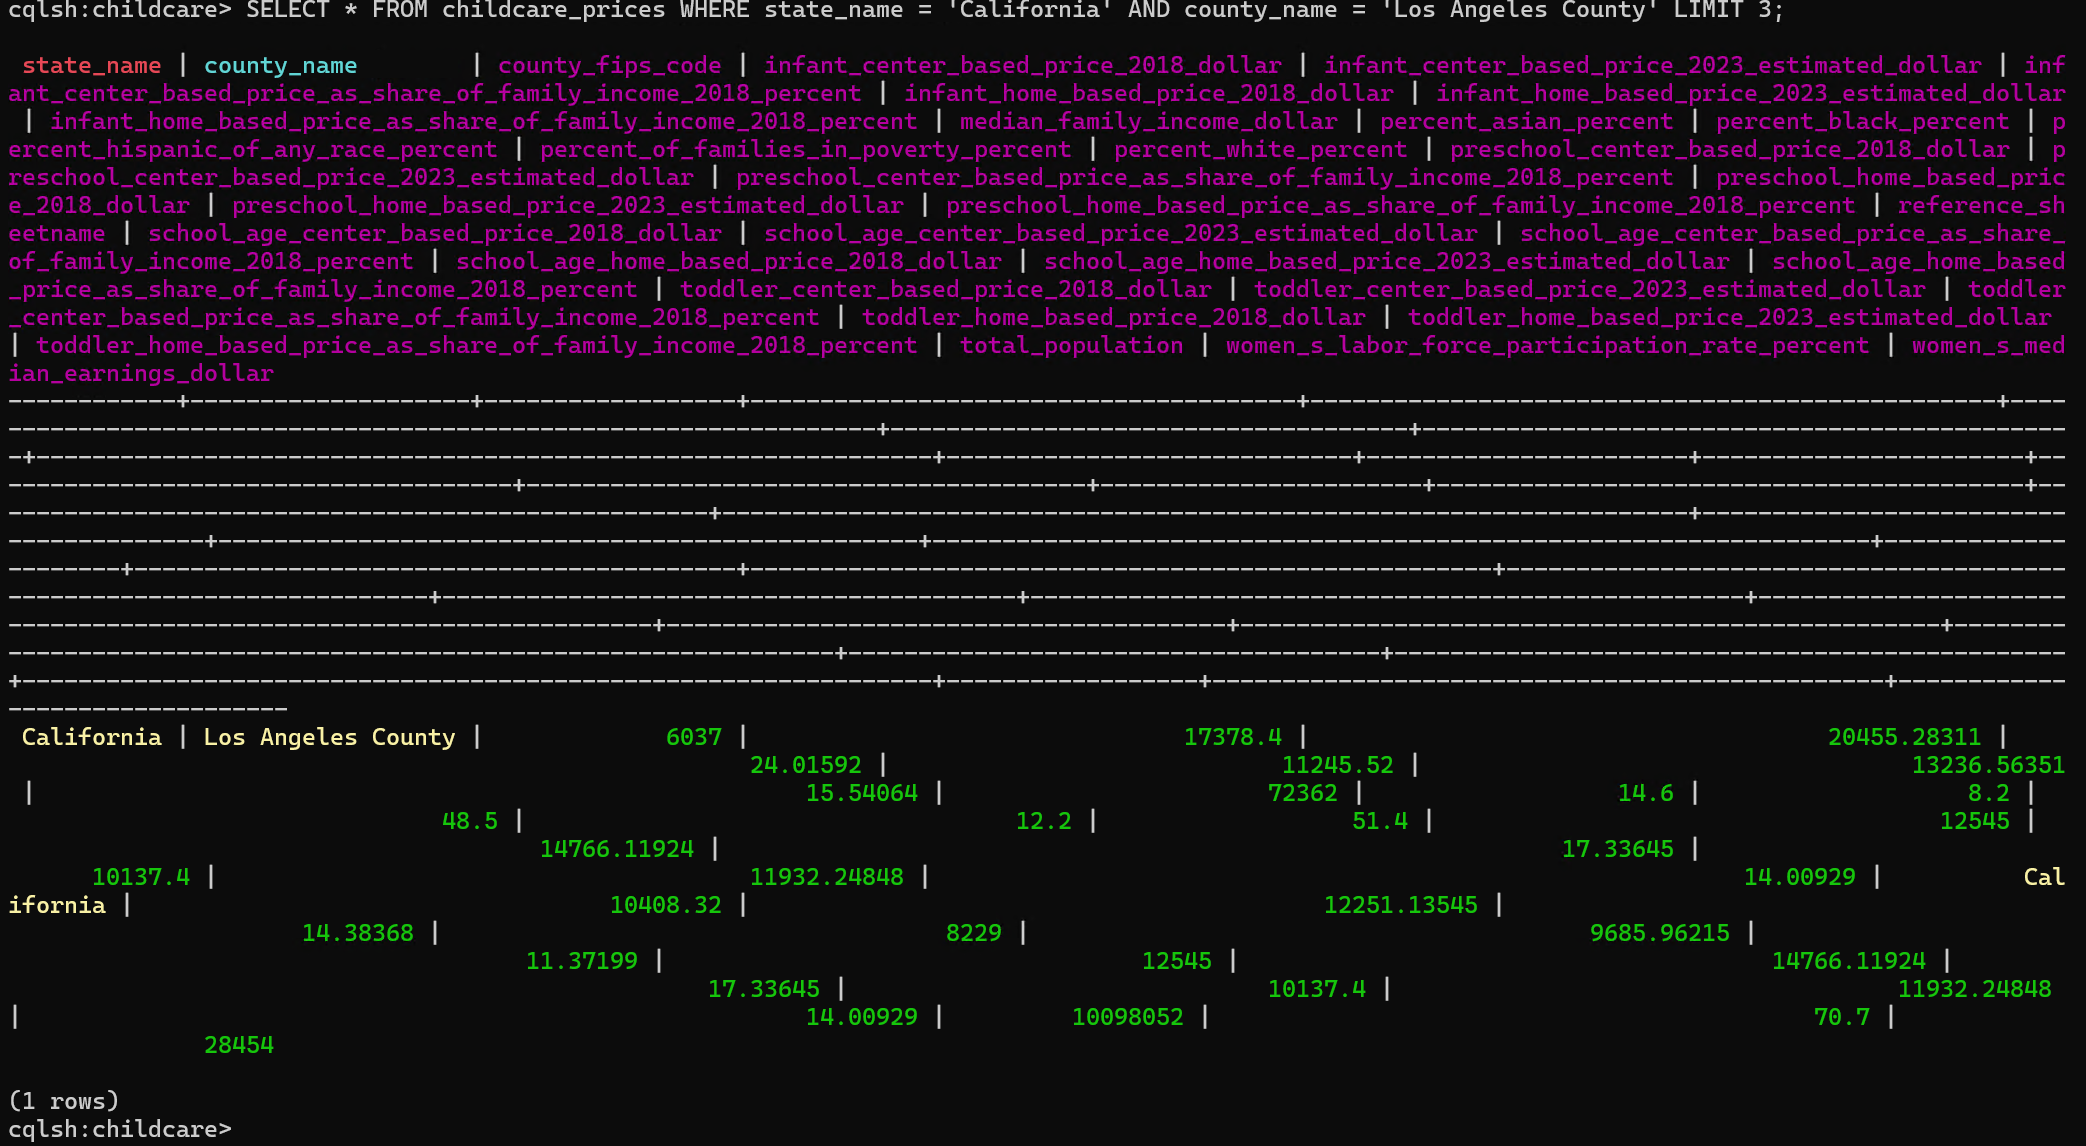Read from Cassandra client

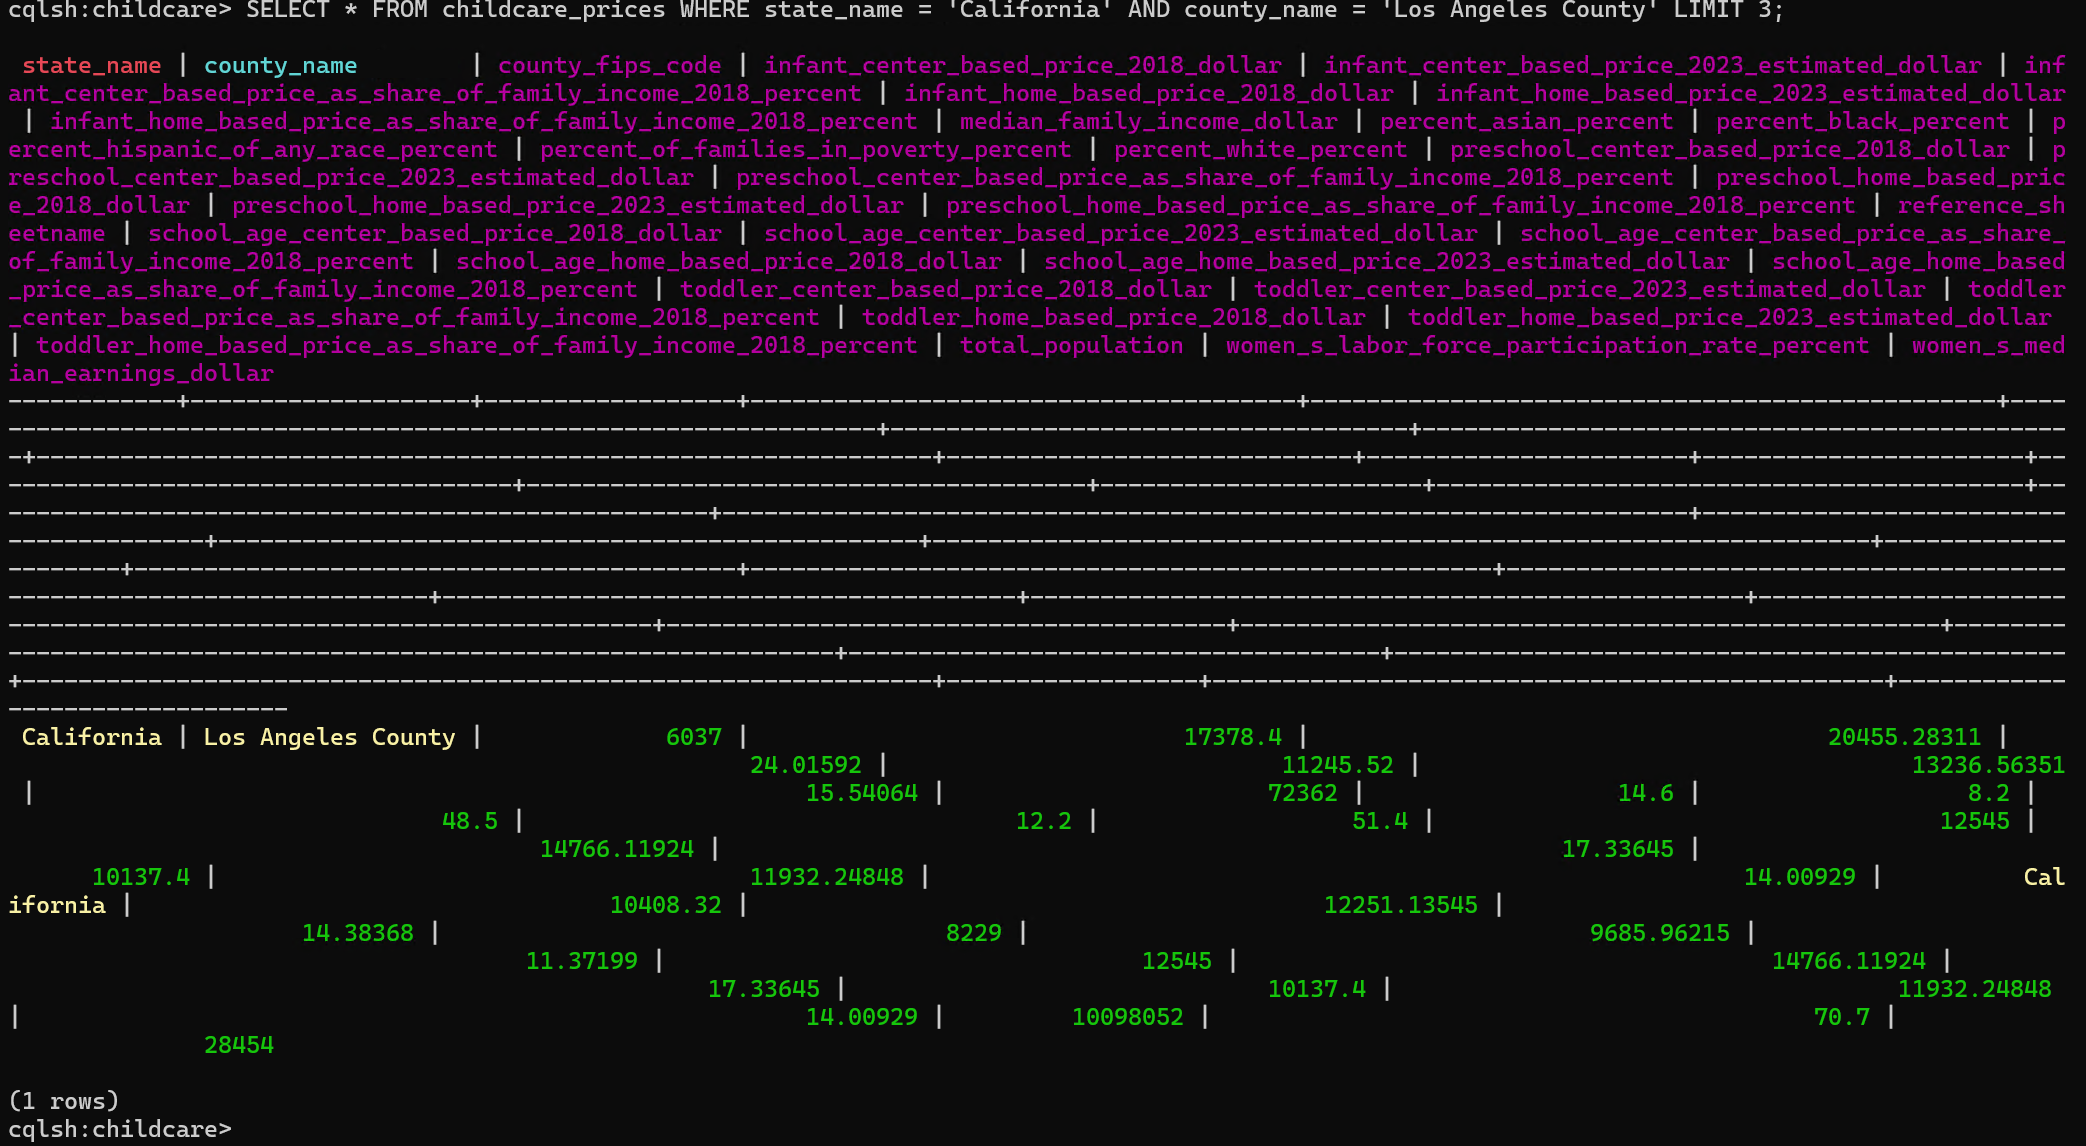

In [62]:
# read back from Cassandra
df1 =spark.read.format("org.apache.spark.sql.cassandra")\
    .options(table="childcare_prices", keyspace="childcare") \
    .load()
df1.toPandas()


state_name        county_name  county_fips_code  \
0     Tennessee    Anderson County             47001   
1     Tennessee     Bedford County             47003   
2     Tennessee      Benton County             47005   
3     Tennessee     Bledsoe County             47007   
4     Tennessee      Blount County             47009   
...         ...                ...               ...   
3137     Kansas  Washington County             20201   
3138     Kansas     Wichita County             20203   
3139     Kansas      Wilson County             20205   
3140     Kansas     Woodson County             20207   
3141     Kansas   Wyandotte County             20209   

      infant_center_based_price_2018_dollar  \
0                                   9620.00   
1                                   6605.04   
2                                   6605.04   
3                                   6605.04   
4                                   9620.00   
...                                     ...   
3137                                5876.00   
3138                                5876.00   
3139                                5876.00   
3140                                5876.00   
3141                                7883.20   

      infant_center_based_price_2023_estimated_dollar  \
0                                        11323.241697   
1                                         7774.476542   
2                                         7774.476542   
3                                         7774.476542   
4                                        11323.241697   
...                                               ...   
3137                                      6916.358442   
3138                                      6916.358442   
3139                                      6916.358442   
3140                                      6916.358442   
3141                                      9278.937520   

      infant_center_based_price_as_share_of_family_income_2018_percent  \
0                                             15.715103                  
1                                             12.264260                  
2                                             14.095864                  
3                                             12.419691                  
4                                             14.354353                  
...                                                 ...                  
3137                                           9.849310                  
3138                                           8.596928                  
3139                                          10.140826                  
3140                                          11.161130                  
3141                                          14.822503                  

      infant_home_based_price_2018_dollar  \
0                                  7020.0   
1                                  5070.0   
2                                  5070.0   
3                                  5070.0   
4                                  7020.0   
...                                   ...   
3137                               5007.6   
3138                               5007.6   
3139                               5007.6   
3140                               5007.6   
3141                               5746.0   

      infant_home_based_price_2023_estimated_dollar  \
0                                       8262.906103   
1                                       5967.654408   
2                                       5967.654408   
3                                       5967.654408   
4                                       8262.906103   
...                                             ...   
3137                                    5894.206353   
3138                                    5894.206353   
3139                                    5894.206353   
3140                                    5894.206353   
3141                                    6763.34

In [63]:
# Filter data from Cassandra for a new table to Elasticsearch

newdf1 = df1.select("state_name", "county_name", "infant_center_based_price_2018_dollar",
        "infant_center_based_price_as_share_of_family_income_2018_percent", "infant_home_based_price_2018_dollar",
        "infant_home_based_price_as_share_of_family_income_2018_percent", "toddler_center_based_price_2018_dollar",
        "toddler_center_based_price_as_share_of_family_income_2018_percent",
        "toddler_home_based_price_2018_dollar", "toddler_home_based_price_as_share_of_family_income_2018_percent",
        "preschool_center_based_price_2018_dollar", "preschool_center_based_price_as_share_of_family_income_2018_percent",
        "preschool_home_based_price_2018_dollar", "preschool_home_based_price_as_share_of_family_income_2018_percent",
        "school_age_center_based_price_2018_dollar", "school_age_center_based_price_as_share_of_family_income_2018_percent",
        "school_age_home_based_price_2018_dollar", "school_age_home_based_price_as_share_of_family_income_2018_percent",
        "total_population", "womens_labor_force_participation_rate_percent", "womens_median_earnings_dollar",
        "median_family_income_dollar", "percent_of_families_in_poverty_percent", "percent_asian_percent",
        "percent_black_percent", "percent_hispanic_of_any_race_percent", "percent_white_percent") \

# Display the new DataFrame
newdf1.toPandas()

state_name        county_name  infant_center_based_price_2018_dollar  \
0      Oklahoma       Adair County                                6583.72   
1      Oklahoma     Alfalfa County                                7929.48   
2      Oklahoma       Atoka County                                6705.40   
3      Oklahoma      Beaver County                                7760.48   
4      Oklahoma     Beckham County                                7985.64   
...         ...                ...                                    ...   
3137     Kansas  Washington County                                5876.00   
3138     Kansas     Wichita County                                5876.00   
3139     Kansas      Wilson County                                5876.00   
3140     Kansas     Woodson County                                5876.00   
3141     Kansas   Wyandotte County                                7883.20   

      infant_center_based_price_as_share_of_family_income_2018_percent  \
0                                             15.911545                  
1                                             11.652261                  
2                                             14.399467                  
3                                             13.160717                  
4                                             12.439660                  
...                                                 ...                  
3137                                           9.849310                  
3138                                           8.596928                  
3139                                          10.140826                  
3140                                          11.161130                  
3141                                          14.822503                  

      infant_home_based_price_2018_dollar  \
0                                 4958.72   
1                                 5969.08   
2                                 5053.36   
3                                 5842.72   
4                                 6014.32   
...                                   ...   
3137                              5007.60   
3138                              5007.60   
3139                              5007.60   
3140                              5007.60   
3141                              5746.00   

      infant_home_based_price_as_share_of_family_income_2018_percent  \
0                                             11.984243                
1                                              8.771480                
2                                             10.851805                
3                                              9.908457                
4                                              9.368829                
...                                                 ...                
3137                                           8.393704                
3138                                           7.326408                
3139                                           8.642137                
3140                                           9.511653                
3141                                          10.804001                

      toddler_center_based_price_2018_dollar  \
0                                    5535.40   
1                                    6665.36   
2                                    5639.92   
3                                    6523.92   
4                                    6714.24   
...                                      ...   
3137                                 6089.20   
3138                                 6089.20   
3139                                 6089.20   
3140                                 6089.20   
3141                                 7332.00   

      toddler_center_based_price_as_share_of_family_income_2018_percent  \
0                                             13.377964                   
1                                              9.794654   

#### And save locally

In [68]:
newdf1.write.format("json").mode("overwrite").save("/home/jovyan/Walker-Labs/Project/datasets/childcare.json")

----
## **Dataset #2: Labor Force Statistics: Employment and Earnings**

#### **Problem Statement**
The dataset contains hierarchical information on employment statistics categorized by age, sex, race, ethnicity, and various employment metrics. The data is unstructured and difficult to query efficiently due to its nested relationships and mixed levels of granularity. Furthermore, the dataset includes unnecessary rows, columns, and some missing values that must be cleaned before storage.

#### **Data Processing**
- Remove Unnecessary Columns and Rows:
    - Drop rows containing irrelevant or redundant information, such as totals or footnotes.
    - Eliminate columns with no meaningful data or those outside the scope of the analysis.
- Handle Missing Values:

    - Remove rows with missing values in key attributes such as Age, Sex, Race, Ethnicity.
    - Ensure remaining data is complete for meaningful analysis.
    
#### **Categorize Data**
- Organize the dataset into hierarchical categories:
    - Main Categories: Summary Totals, White, Black or African American, Asian, Hispanic or Latino ethnicity.
    - Subcategories: Men, Women.
    - Subcollections: Years (e.g., 16 to 19, 20 to 24).
- Create a nested structure to group related metrics for each demographic.

#### **Transform into JSON**
- Convert the cleaned and categorized dataset into a JSON format, preserving its hierarchical structure.

### **Data Storage**
***MongoDB*** is chosen as the storage solution because:

- **Support for Hierarchical Data:** MongoDB’s flexible schema supports nested structures, allowing the data’s inherent hierarchy to be retained without flattening.
- **Scalable and Efficient Querying:** MongoDB enables ad-hoc queries and analysis of hierarchical data with minimal overhead, making it ideal for dynamic insights.
- **Flexibility:** The schema-less design ensures future modifications, such as adding new categories or metrics, are seamless.
- **Better Readability:** The JSON-like structure makes it easy to visualize relationships between categories and subcategories, aiding downstream analysis.

This approach ensures that the data is both clean and well-organized, allowing for efficient storage and retrieval in MongoDB while preserving the analytical flexibility required for hierarchical datasets.

In [11]:
# Bureau of Labor Statistics' 2018 data on earnings by age, race, & sex

# MinIO Configuration
s3_url = "http://minio:9000"
s3_key = "minio"
s3_secret = "SU2orange!"
s3_bucket = "project"
s3_file_key = "cpsaat08.xlsx"

# Initialize MinIO client
s3 = boto3.client('s3',
                  endpoint_url=s3_url,
                  aws_access_key_id=s3_key,
                  aws_secret_access_key=s3_secret)

# Download Excel file locally from MinIO
local_file = "/tmp/cpsaat08.xlsx"
s3.download_file(s3_bucket, s3_file_key, local_file)

# Read the Excel file using pandas
# Specify the sheet name and skip rows if needed
bls_pd = pd.read_excel(local_file, sheet_name="cpsaat08", skiprows=9)


In [12]:
# Adjust Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand display width to avoid line wrapping

# Display the DataFrame
display(bls_pd)

# Optionally, reset Pandas options to defaults after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


TOTAL  Unnamed: 1  Unnamed: 2  \
0                            Total, 16 years and over    128572.0    115402.0   
1                                      16 to 19 years      1478.0      1273.0   
2                                      16 to 17 years       231.0       192.0   
3                                      18 to 19 years      1247.0      1081.0   
4                                   20 years and over    127095.0    114129.0   
5                                      20 to 24 years      9543.0      8629.0   
6                                   25 years and over    117552.0    105500.0   
7                                      25 to 54 years     88993.0     80300.0   
8                                   55 years and over     28559.0     25200.0   
9                              Men, 16 years and over     72935.0     66314.0   
10                                     16 to 19 years       874.0       758.0   
11                                  20 years and over     72061.0     65556.0   
12                                     20 to 24 years      5261.0      4815.0   
13                                  25 years and over     66800.0     60740.0   
14                                     25 to 54 years     50472.0     46166.0   
15                                  55 years and over     16328.0     14575.0   
16                           Women, 16 years and over     55638.0     49088.0   
17                                     16 to 19 years       604.0       515.0   
18                                  20 years and over     55033.0     48574.0   
19                                     20 to 24 years      4281.0      3814.0   
20                                  25 years and over     50752.0     44760.0   
21                                     25 to 54 years     38521.0     34135.0   
22                                  55 years and over     12231.0     10625.0   
23                                                NaN         NaN         NaN   
24                                              White         NaN         NaN   
25                             Men, 16 years and over     58015.0     52678.0   
26                                     16 to 19 years       702.0       610.0   
27                                  20 years and over     57312.0     52068.0   
28                                     20 to 24 years      4111.0      3763.0   
29                                  25 years and over     53201.0     48305.0   
30                                     25 to 54 years     39476.0     36068.0   
31                                  55 years and over     13726.0     12238.0   
32                           Women, 16 years and over     41825.0     36781.0   
33                                     16 to 19 years       457.0       386.0   
34                                  20 years and over     41369.0     36395.0   
35                                     20 to 24 years      3187.0      2834.0   
36                                  25 years and over     38182.0     33561.0   
37                                     25 to 54 years     28451.0     25121.0   
38                                  55 years and over      9731.0      8441.0   
39                                                NaN         NaN         NaN   
40                          Black or African American         NaN         NaN   
41                             Men, 16 years and over      7899.0      7239.0   
42                                     16 to 19 years       103.0        89.0   
43                                  20 years and over      7797.0      7150.0   
44                                     20 to 24 years       659.0       610.0   
45                                  25 years and over      7137.0      6540.0   
46                                     25 to 54 years      5704.0      5252.0   
47                                  55 years and over      1434.0      1288.0   
48                           Women, 16 years and over      8154.0      7261.0  

### **PART II: Dataset Preprocessing, Transformation, and Storage**

This will include cleaning data, handling missing values, We'll ensure the data quality and integrity are maintained to ensure reliable analysis.

**Description**
This code performs several essential data exploration and preprocessing tasks on the DataFrames.


**Purpose**
To gather comprehensive information about the DataFrame's structure, statistical summary, and data quality, which is crucial for effective data analysis and preprocessing.

### Get Shape and check unique values for Reference_SheetName column

In [13]:
print(f"Total number of columns: {len(bls_pd.columns)}")
print(" ")
print("Column names:", bls_pd.columns)
print(" ")

Total number of columns: 11
 
Column names: Index(['TOTAL', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')
 


In [14]:
# Check unique values in the Reference_SheetName
print(bls_pd['TOTAL'].unique())
print(" ")

# Group by 'Reference_SheetName' and count rows
row_counts = bls_pd.groupby('TOTAL').size().reset_index(name='Total_Rows')

# Sort the results by 'Total_Rows' in descending order
row_counts = row_counts.sort_values(by='Total_Rows', ascending=False)

# Display the result
print(row_counts)

# Get Data Frame shape
#print(f"DataFrame shape: {childcare_df.shape}")
print(" ")

# Display DataFrame info
bls_pd.info()

['Total, 16 years and over' '16 to 19 years' '16 to 17 years'
 '18 to 19 years' '20 years and over' '20 to 24 years' '25 years and over'
 '25 to 54 years' '55 years and over' 'Men, 16 years and over'
 'Women, 16 years and over' nan 'White' 'Black or African American'
 'Asian' 'Hispanic or Latino ethnicity' 'Footnotes:'
 '(1) Employed persons are classified as full- or part-time workers based on their usual weekly hours at all jobs regardless of the number of hours they are at work during the reference week. Persons absent from work also are classified according to their usual status. Full time is 35 hours or more per week; part time is less than 35 hours.'
 '(2) Includes some persons at work 35 hours or more classified by their reason for usually working part time.'
 'NOTE: Estimates for the above race groups (White, Black or African American, and Asian) do not sum to totals because data are not presented for all races. Persons whose ethnicity is identified as Hispanic or Latino may be

### **Standardizing Column Names for Consistent and Readable Data**

In [15]:
# Rename columns in a Pandas DataFrame

# Sample column mapping
column_mapping = {
    "TOTAL": "Age, Sex, Race, Ethnicity",
    "Unnamed: 1": "Employed, Full-Time Workers - Total",
    "Unnamed: 2": "Employed, Full-Time Workers at Work 35hrs or More",
    "Unnamed: 3": "Employed, Full-Time Workers at Work Less Than 35hrs",
    "Unnamed: 4": "Employed, Full-Time Workers - Not at Work",
    "Unnamed: 5": "Employed, Part-Time Workers - Total",
    "Unnamed: 6": "Employed, Part-Time for Economic Reasons",
    "Unnamed: 7": "Employed, Part-Time for Non-Economic Reasons",
    "Unnamed: 8": "Employed, Part-Time - Not At Work",
    "Unnamed: 9": "Unemployed, Looking for Full-Time Work",
    "Unnamed: 10": "Unemployed, Looking for Part-Time Work"
}

# Apply mapping and sanitize column names
sanitized_column_mapping = {key: sanitize_column(value) for key, value in column_mapping.items()}

# Sample DataFrame with original column names
original_columns = list(column_mapping.keys())
bls_df = pd.DataFrame(columns=original_columns)

# Rename and sanitize columns
bls_df = bls_df.rename(columns=sanitized_column_mapping)

# Display the new column names
print("Sanitized Column Names:")
print(list(bls_df.columns))


Sanitized Column Names:
['age_sex_race_ethnicity', 'employed_full_time_workers_total', 'employed_full_time_workers_at_work_35hrs_or_more', 'employed_full_time_workers_at_work_less_than_35hrs', 'employed_full_time_workers_not_at_work', 'employed_part_time_workers_total', 'employed_part_time_for_economic_reasons', 'employed_part_time_for_non_economic_reasons', 'employed_part_time_not_at_work', 'unemployed_looking_for_full_time_work', 'unemployed_looking_for_part_time_work']


In [16]:
# Rename and sanitize columns in the original DataFrame (bls_pd)
bls_pd = bls_pd.rename(columns=sanitized_column_mapping)


# Adjust Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand display width to avoid line wrapping

# Display the DataFrame
#display(bls_pd)

# Optionally, reset Pandas options to defaults after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


In [17]:
# Define the indices of rows to remove
rows_to_remove = [87, 88, 89, 90, 91]

# Drop the rows by index
bls_pd = bls_pd.drop(rows_to_remove, axis=0)

# Reset the index (optional, if you want sequential indices)
bls_pd.reset_index(drop=True, inplace=True)


In [18]:
# Display the updated DataFrame
display(bls_pd)

age_sex_race_ethnicity  employed_full_time_workers_total  \
0   Total, 16 years and over                          128572.0   
1             16 to 19 years                            1478.0   
2             16 to 17 years                             231.0   
3             18 to 19 years                            1247.0   
4          20 years and over                          127095.0   
..                       ...                               ...   
82         20 years and over                            8554.0   
83            20 to 24 years                             890.0   
84         25 years and over                            7664.0   
85            25 to 54 years                            6468.0   
86         55 years and over                            1196.0   

    employed_full_time_workers_at_work_35hrs_or_more  \
0                                           115402.0   
1                                             1273.0   
2                                              192.0   
3                                             1081.0   
4                                           114129.0   
..                                               ...   
82                                            7587.0   
83                                             784.0   
84                                            6803.0   
85                                            5752.0   
86                                            1051.0   

    employed_full_time_workers_at_work_less_than_35hrs  \
0                                              9357.0    
1                                               173.0    
2                                                33.0    
3                                               139.0    
4                                              9184.0    
..                                                ...    
82                                              673.0    
83                                               78.0    
84                                              595.0    
85                                              497.0    
86                                               99.0    

    employed_full_time_workers_not_at_work  employed_part_time_workers_total  \
0                                   3814.0                           27189.0   
1                                     33.0                            3648.0   
2                                      5.0                            1607.0   
3                                     27.0                            2041.0   
4                                   3781.0                           23540.0   
..                                     ...                               ...   
82                                   293.0                            2491.0   
83                                    28.0                             566.0   
84                                   265.0                            1926.0   
85                                   219.0                            1512.0   
86                                    47.0                             414.0   

    employed_part_time_for_economic_reasons  \
0                                    3564.0   
1                                     243.0   
2                                      31.0   
3                                     212.0   
4                                    3320.0   
..                                      ...   
82                                    475.0   
83                                     96.0   
84                                    379.0   
85                                    299.0   
86                                     80.0   

    employed_part_time_for_non_economic_reasons  \
0                                       22072.0   
1                                        3250.0   
2                                        1501.0   
3                                        1749.0   
4                                       18822.0   
..         

In [19]:
# Remove rows where 'Age, Sex, Race, Ethnicity' column has NaN values
bls_pd = bls_pd.dropna(subset=['age_sex_race_ethnicity'])

In [20]:
# Adjust Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand display width to avoid line wrapping

# Display the DataFrame
display(bls_pd)

# Optionally, reset Pandas options to defaults after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

age_sex_race_ethnicity  employed_full_time_workers_total  \
0       Total, 16 years and over                          128572.0   
1                 16 to 19 years                            1478.0   
2                 16 to 17 years                             231.0   
3                 18 to 19 years                            1247.0   
4              20 years and over                          127095.0   
5                 20 to 24 years                            9543.0   
6              25 years and over                          117552.0   
7                 25 to 54 years                           88993.0   
8              55 years and over                           28559.0   
9         Men, 16 years and over                           72935.0   
10                16 to 19 years                             874.0   
11             20 years and over                           72061.0   
12                20 to 24 years                            5261.0   
13             25 years and over                           66800.0   
14                25 to 54 years                           50472.0   
15             55 years and over                           16328.0   
16      Women, 16 years and over                           55638.0   
17                16 to 19 years                             604.0   
18             20 years and over                           55033.0   
19                20 to 24 years                            4281.0   
20             25 years and over                           50752.0   
21                25 to 54 years                           38521.0   
22             55 years and over                           12231.0   
24                         White                               NaN   
25        Men, 16 years and over                           58015.0   
26                16 to 19 years                             702.0   
27             20 years and over                           57312.0   
28                20 to 24 years                            4111.0   
29             25 years and over                           53201.0   
30                25 to 54 years                           39476.0   
31             55 years and over                           13726.0   
32      Women, 16 years and over                           41825.0   
33                16 to 19 years                             457.0   
34             20 years and over                           41369.0   
35                20 to 24 years                            3187.0   
36             25 years and over                           38182.0   
37                25 to 54 years                           28451.0   
38             55 years and over                            9731.0   
40     Black or African American                               NaN   
41        Men, 16 years and over                            7899.0   
42                16 to 19 years                             103.0   
43             20 years and over                            7797.0   
44                20 to 24 years                             659.0   
45             25 years and over                            7137.0   
46                25 to 54 years                            5704.0   
47             55 years and over                            1434.0   
48      Women, 16 years and over                            8154.0   
49                16 to 19 years                              95.0   
50             20 years and over                            8058.0   
51                20 to 24 years                             667.0   
52             25 years and over                            7391.0   
53                25 to 54 years                            5861.0   
54             55 years and over                            1530.0   
56                         Asian                               NaN   
57        Men, 16 years and over                            4661.0   
58                16 to 19 years                              22.0   
59             20 ye

### Save to Mongo

In [21]:
# Export the DataFrame to CSV
output_csv_path = "bls_pd_data.csv"  # Local file path
bls_pd.to_csv(output_csv_path, index=False)

print(f"Data exported to {output_csv_path}")


Data exported to bls_pd_data.csv


In [22]:
import os

# Print the current working directory
print("File exported to:", os.getcwd())

File exported to: /home/jovyan/Walker - Labs/Project


#### *See Part II for BLS Data to Mongo*

----
## Dataset #3: National Center for Education Studies

#### **Problem Statement**
The dataset from the National Center for Education Studies (NCES) contains state-level educational statistics. However, the dataset requires significant preprocessing to address missing values, standardize formats, and optimize storage for efficient querying and analysis. Without these preprocessing steps, the dataset risks becoming error-prone and challenging to analyze, limiting its usability for decision-making and educational policy planning.

#### **Data Processing**
- Handle Missing Values:

    - Identify columns with missing values and impute them with default values such as:
    - Zero for numeric fields.
    - "Unknown" for categorical fields.
    - Ensure completeness for accurate analytics and computations.
    
- Standardize Column Names:

    - Sanitize column names by:
    - Removing spaces and special characters (e.g., replacing % with _percent, $ with _dollar).
    - Converting to snake_case for consistency and ease of querying.
    - Validate column names for compliance with Cassandra's schema requirements.
    
- Validate Data Consistency:

    - Group data by state and validate counts for each category (e.g., school levels, demographics).
    - Ensure data integrity across rows and columns:
    - Numeric consistency for statistical columns.
    - Uniform categorizations for demographic groups.

#### **Prepare Data for Querying**

- Clean numeric columns by:
    - Removing invalid or outlier values.
    - Converting strings to numeric types where necessary.
    
- Create a flattened, structured dataset optimized for database insertion:
    - Combine relevant metadata into a single table for easier querying.

#### **Data Storage** 

***Cassandra*** is selected as the preferred storage solution due to its scalability and suitability for write-heavy workloads in distributed systems. The storage will be optimized for educational datasets.

Advantages of Cassandra
- **High Scalability: ** Cassandra can handle large datasets, ideal for managing state-wise and nationwide educational statistics.

- **Distributed Data Model: ** The architecture enables quick access and querying, even for distributed analytics across multiple regions.

- **Efficient Querying: ** Schema design with partition keys like state or school_level ensures fast data retrieval.

- **Write-Optimized: ** Cassandra's write-heavy optimization makes it suitable for continuously ingesting new datasets.

In [ ]:
# MinIO Configuration
s3_url = "http://minio:9000"
s3_key = "minio"
s3_secret = "SU2orange!"
s3_bucket = "project"
s3_file_key = "tabn102.30.xlsx"

# Initialize MinIO client
s3 = boto3.client('s3',
                  endpoint_url=s3_url,
                  aws_access_key_id=s3_key,
                  aws_secret_access_key=s3_secret)

# Download Excel file locally from MinIO
local_file = "/home/jovyan/datasets/tabn102.30.xlsx
s3.download_file(s3_bucket, s3_file_key, local_file)

#if fails, try this replacing local file as this
#local_file = "/tmp/tabn102.30.xlsx

---
**Note:** ***To prevent Jupyter Notebook from throwing errors related to the Spark context:***

- Restart the kernel.
- Re-run the necessary library installations and imports.
- Execute the required user defined functions in order.

For current dataset, Dataset #3, I have commented out the initialization of Spark with MinIO to ensure the Spark context is configured for Cassandra. This prevents conflicts and avoids potential errors.

---

In [ ]:
pip install boto3

In [ ]:
pip install openpyxl

In [ ]:
pip install -q cassandra-driver  

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import os
import subprocess
from urllib.request import Request, urlopen, urlretrieve  
from urllib.error import HTTPError

# install if needed: pip install boto3 , openpyxl
import boto3
from openpyxl import load_workbook
from pyspark.sql.functions import lit
import pandas as pd
from IPython.display import display
import re
from pyspark.sql.functions import col
import json
from cassandra.cluster import Cluster

In [ ]:
# 1. Function to sanitize a single column name
def sanitize_column(name):
    """
    Sanitizes a column name by replacing special characters and standardizing the format.
    - Replaces '%' with '_percent' and '$' with '_dollar'.
    - Converts spaces and special characters into underscores.
    - Strips leading/trailing underscores and converts to lowercase.
    """
    # Replace '%' and '$' with meaningful labels
    name = name.replace('%', '_percent')
    name = name.replace('$', '_dollar')
    # Replace special characters with underscores
    name = re.sub(r'[^\w\s]', '_', name)  # Retain alphanumeric and spaces
    # Replace spaces with underscores and collapse multiple underscores
    name = re.sub(r'\s+', '_', name)
    name = re.sub(r'_+', '_', name)
    # Remove leading/trailing underscores and convert to lowercase
    return name.strip('_').lower()

# 2. Function to apply sanitization to all columns in a DataFrame
def sanitize_dataframe_columns(dataframe):
    """
    Sanitizes all column names in a Pandas DataFrame.
    """
    sanitized_columns = [sanitize_column(col) for col in dataframe.columns]
    dataframe.columns = sanitized_columns
    return dataframe

In [10]:
'''
# MinIO Configuration
s3_url = "http://minio:9000"
s3_key = "minio"
s3_secret = "SU2orange!"
s3_bucket = "project"
s3_file_key = "tabn102.30.xlsx"

# Initialize MinIO client
s3 = boto3.client('s3',
                  endpoint_url=s3_url,
                  aws_access_key_id=s3_key,
                  aws_secret_access_key=s3_secret)

# Download Excel file locally from MinIO
'''
local_file = "/home/jovyan/datasets/tabn102.30.xlsx"
#s3.download_file(s3_bucket, s3_file_key, local_file)

# Read the Excel file using pandas
# Specify the sheet name and skip rows if needed
nces_pd = pd.read_excel(local_file, sheet_name="Digest 2022 Table 102.30", skiprows=3)

# Adjust Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand display width to avoid line wrapping

# Display the DataFrame
display(nces_pd)

# Optionally, reset Pandas options to defaults after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

1        2        3  \
0                                       United States  63600.0  68500.0   
1                                            Alabama   49900.0  55700.0   
2                                              Alaska  87600.0  84100.0   
3                                            Arizona   58300.0  66200.0   
4                                            Arkansas  44700.0  52500.0   
5                                          California  75700.0  77500.0   
6                                           Colorado   63800.0  77000.0   
7                                        Connecticut   88300.0  88000.0   
8                                           Delaware   73800.0  77300.0   
9                                District of Columbia  65000.0  65500.0   
10                                           Florida   58100.0  63300.0   
11                                           Georgia   61400.0  69200.0   
12                                            Hawaii   82100.0  81300.0   
13                                             Idaho   53400.0  61300.0   
14                                          Illinois   68200.0  76000.0   
15                                           Indiana   60900.0  67800.0   
16                                               Iowa  55500.0  64400.0   
17                                             Kansas  57700.0  66300.0   
18                                          Kentucky   47700.0  54900.0   
19                                         Louisiana   46400.0  53100.0   
20                                              Maine  58900.0  60700.0   
21                                          Maryland   83300.0  86200.0   
22                                      Massachusetts  78200.0  82400.0   
23                                           Michigan  65600.0  72900.0   
24                                          Minnesota  65400.0  76800.0   
25                                        Mississippi  42600.0  51100.0   
26                                          Missouri   55800.0  61900.0   
27                                            Montana  48600.0  53900.0   
28                                          Nebraska   55000.0  64000.0   
29                                             Nevada  65600.0  72700.0   
30                                      New Hampshire  76900.0  80700.0   
31                                         New Jersey  86600.0  90000.0   
32                                         New Mexico  51000.0  55700.0   
33                                           New York  69700.0  70800.0   
34                                     North Carolina  56400.0  63900.0   
35                                      North Dakota   49100.0  56400.0   
36                                              Ohio   60700.0  66800.0   
37                                          Oklahoma   49900.0  54500.0   
38                                             Oregon  57600.0  66700.0   
39                                       Pennsylvania  61500.0  65400.0   
40                                      Rhode Island   68100.0  68700.0   
41                                     South Carolina  55500.0  60500.0   
42                                       South Dakota  47600.0  57600.0   
43                                          Tennessee  52500.0  59300.0   
44                                             Texas   57200.0  65100.0   
45                                              Utah   62300.0  74600.0   
46                                           Vermont   63000.0  66600.0   
47                                          Virginia   70500.0  76100.0   
48                                         Washington  66000.0  74700.0   
49                                      West Virginia  44000.0  48400.0   
50                                         Wisconsin   62300.0  71400.0   
51                                           Wyoming   57300.0  61800.0   
52  \1\Based on 1989 incomes collected in the 1990...      NaN      NaN   
53

### **PART II: Dataset Preprocessing, Transformation, and Storage**

This will include cleaning data, handling missing values, We'll ensure the data quality and integrity are maintained to ensure reliable analysis.

**Description**
This code performs several essential data exploration and preprocessing tasks on the DataFrames.


**Purpose**
To gather comprehensive information about the DataFrame's structure, statistical summary, and data quality, which is crucial for effective data analysis and preprocessing.

### **Handling Missing Data**

In [11]:
# Define the indices of rows to remove
rows_to_remove = [52, 53, 54, 55]

# Drop the rows by index
nces_pd = nces_pd.drop(rows_to_remove, axis=0)

# Reset the index (optional, if you want sequential indices)
nces_pd.reset_index(drop=True, inplace=True)

# Drop all the N/A's
nces_pd = nces_pd.dropna(axis=1)
display(nces_pd)

1        2        3        4  Unnamed: 4        5  \
0          United States  63600.0  68500.0  64300.0        90.0  62300.0   
1               Alabama   49900.0  55700.0  51300.0       450.0  50400.0   
2                 Alaska  87600.0  84100.0  78200.0      1530.0  80400.0   
3               Arizona   58300.0  66200.0  61600.0       550.0  58300.0   
4               Arkansas  44700.0  52500.0  48700.0       510.0  47700.0   
5             California  75700.0  77500.0  74600.0       270.0  71900.0   
6              Colorado   63800.0  77000.0  70400.0       470.0  67300.0   
7           Connecticut   88300.0  88000.0  84800.0       690.0  79700.0   
8              Delaware   73800.0  77300.0  73000.0      1200.0  69500.0   
9   District of Columbia  65000.0  65500.0  65700.0      1640.0  75800.0   
10              Florida   58100.0  63300.0  59000.0       230.0  55300.0   
11              Georgia   61400.0  69200.0  63400.0       370.0  57800.0   
12               Hawaii   82100.0  81300.0  80800.0      1660.0  78500.0   
13                Idaho   53400.0  61300.0  57600.0       710.0  54200.0   
14             Illinois   68200.0  76000.0  69900.0       290.0  66000.0   
15              Indiana   60900.0  67800.0  61200.0       430.0  55600.0   
16                  Iowa  55500.0  64400.0  60600.0       440.0  59700.0   
17                Kansas  57700.0  66300.0  59700.0       620.0  60100.0   
18             Kentucky   47700.0  54900.0  52000.0       400.0  49900.0   
19            Louisiana   46400.0  53100.0  51100.0       490.0  52900.0   
20                 Maine  58900.0  60700.0  59500.0       820.0  57100.0   
21             Maryland   83300.0  86200.0  85700.0       500.0  85700.0   
22         Massachusetts  78200.0  82400.0  79500.0       590.0  77300.0   
23              Michigan  65600.0  72900.0  64000.0       380.0  56600.0   
24             Minnesota  65400.0  76800.0  72400.0       310.0  69100.0   
25           Mississippi  42600.0  51100.0  45800.0       520.0  45900.0   
26             Missouri   55800.0  61900.0  58400.0       300.0  55200.0   
27               Montana  48600.0  53900.0  54700.0       820.0  53100.0   
28             Nebraska   55000.0  64000.0  61000.0       640.0  60300.0   
29                Nevada  65600.0  72700.0  68400.0       750.0  63500.0   
30         New Hampshire  76900.0  80700.0  78900.0       840.0  76000.0   
31            New Jersey  86600.0  90000.0  85800.0       440.0  84300.0   
32            New Mexico  51000.0  55700.0  52100.0       630.0  52400.0   
33              New York  69700.0  70800.0  68800.0       360.0  67400.0   
34        North Carolina  56400.0  63900.0  56600.0       270.0  54000.0   
35         North Dakota   49100.0  56400.0  57100.0       600.0  60600.0   
36                 Ohio   60700.0  66800.0  60500.0       290.0  56200.0   
37             Oklahoma   49900.0  54500.0  51500.0       480.0  52400.0   
38                Oregon  57600.0  66700.0  59700.0       490.0  58000.0   
39          Pennsylvania  61500.0  65400.0  61900.0       330.0  61400.0   
40         Rhode Island   68100.0  68700.0  71600.0      1160.0  65100.0   
41        South Carolina  55500.0  60500.0  54700.0       520.0  52300.0   
42          South Dakota  47600.0  57600.0  56100.0       750.0  57200.0   
43             Tennessee  52500.0  59300.0  54100.0       410.0  51600.0   
44                Texas   57200.0  65100.0  58600.0       210.0  60500.0   
45                 Utah   62300.0  74600.0  66700.0       800.0  68200.0   
46              Vermont   63000.0  66600.0  63500.0      1010.0  61500.0   
47             Virginia   70500.0  76100.0  75400.0       460.0  75600.0   
48            Washington  66000.0  74700.0  68500.0       540.0  69300.0   
49         West Virginia  44000.0  48400.0  46500.0       680.0  47600.0   
50            Wisconsin   62300.0  71400.0  65500.0       330.0  61000.0   
51              Wyoming   57300.0  61800.0  64300.0      1280.0  66600.

In [10]:
print("Column names:", nces_pd.columns)

Column names: Index([            1,           '2',             3,             4,
        'Unnamed: 4',             5,  'Unnamed: 6',             6,
        'Unnamed: 8',             7, 'Unnamed: 10',             8,
       'Unnamed: 12',             9, 'Unnamed: 14',            10,
       'Unnamed: 16',            11, 'Unnamed: 18'],
      dtype='object')


### **Standardizing Column Names for Consistent and Readable Data**

In [12]:
# Rename columns in a Pandas DataFrame

# Sample column mapping
column_mapping = {    
    1: "state_name",
    "2":"Median Income 1990",
    3:"Median Income 2000",
    4:"Median Income 2005",
    "Unnamed: 4": "Std Error 2005",
    5:"Median Income 2010",
    "Unnamed: 6": "Std Error 2010",
    6:"Median Income 2015",
    "Unnamed: 8": "Std Error 2015",
    7:"Median Income 2016",
    "Unnamed: 10": "Std Error 2016",
    8:"Median Income 2017",
    "Unnamed: 12": "Std Error 2017",
    9:"Median Income 2018",
    "Unnamed: 14": "Std Error 2018",
    10:"Median Income 2019",
    "Unnamed: 16": "Std Error 2019",
    11:"Median Income 2021",
    "Unnamed: 18": "Std Error 2021"
}

# Apply mapping and sanitize column names
sanitized_column_mapping = {key: sanitize_column(value) for key, value in column_mapping.items()}

# Sample DataFrame with original column names
original_columns = list(column_mapping.keys())
nces_df = pd.DataFrame(columns=original_columns)

# Rename and sanitize columns
nces_df = nces_df.rename(columns=sanitized_column_mapping)

# Display the new column names
#print("Sanitized Column Names:")
#print(list(nces_df.columns))

# Rename and sanitize columns in the original DataFrame (bls_pd)
nces_pd = nces_pd.rename(columns=sanitized_column_mapping)


# Adjust Pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand display width to avoid line wrapping

# Display the DataFrame
display(nces_pd)

state_name  median_income_1990  median_income_2000  \
0          United States             63600.0             68500.0   
1               Alabama              49900.0             55700.0   
2                 Alaska             87600.0             84100.0   
3               Arizona              58300.0             66200.0   
4               Arkansas             44700.0             52500.0   
5             California             75700.0             77500.0   
6              Colorado              63800.0             77000.0   
7           Connecticut              88300.0             88000.0   
8              Delaware              73800.0             77300.0   
9   District of Columbia             65000.0             65500.0   
10              Florida              58100.0             63300.0   
11              Georgia              61400.0             69200.0   
12               Hawaii              82100.0             81300.0   
13                Idaho              53400.0             61300.0   
14             Illinois              68200.0             76000.0   
15              Indiana              60900.0             67800.0   
16                  Iowa             55500.0             64400.0   
17                Kansas             57700.0             66300.0   
18             Kentucky              47700.0             54900.0   
19            Louisiana              46400.0             53100.0   
20                 Maine             58900.0             60700.0   
21             Maryland              83300.0             86200.0   
22         Massachusetts             78200.0             82400.0   
23              Michigan             65600.0             72900.0   
24             Minnesota             65400.0             76800.0   
25           Mississippi             42600.0             51100.0   
26             Missouri              55800.0             61900.0   
27               Montana             48600.0             53900.0   
28             Nebraska              55000.0             64000.0   
29                Nevada             65600.0             72700.0   
30         New Hampshire             76900.0             80700.0   
31            New Jersey             86600.0             90000.0   
32            New Mexico             51000.0             55700.0   
33              New York             69700.0             70800.0   
34        North Carolina             56400.0             63900.0   
35         North Dakota              49100.0             56400.0   
36                 Ohio              60700.0             66800.0   
37             Oklahoma              49900.0             54500.0   
38                Oregon             57600.0             66700.0   
39          Pennsylvania             61500.0             65400.0   
40         Rhode Island              68100.0             68700.0   
41        South Carolina             55500.0             60500.0   
42          South Dakota             47600.0             57600.0   
43             Tennessee             52500.0             59300.0   
44                Texas              57200.0             65100.0   
45                 Utah              62300.0             74600.0   
46              Vermont              63000.0             66600.0   
47             Virginia              70500.0             76100.0   
48            Washington             66000.0             74700.0   
49         West Virginia             44000.0             48400.0   
50            Wisconsin              62300.0             71400.0   
51              Wyoming              57300.0             61800.0   

    median_income_2005  std_error_2005  median_income_2010  std_error_2010  \
0              64300.0            90.0             62300.0            50.0   
1              51300.0           450.0             50400.0           360.0   
2              78200.0          1530.0             80400.0          1580.0   
3              61600.0           550.0             58300.0           400.0   
4              4870

In [14]:
cassandra_host = "cassandra"

# Create a SparkSession with Cassandra configuration
spark = SparkSession.builder \
    .appName("WriteToCassandra") \
    .config("spark.cassandra.connection.host", cassandra_host) \
    .config("spark.jars.packages","com.datastax.spark:spark-cassandra-connector-assembly_2.12:3.1.0")\
    .config("spark.sql.extensions", "com.datastax.spark.connector.CassandraSparkExtensions") \
    .getOrCreate()

In [15]:
nces_df = spark.createDataFrame(nces_pd)
nces_df.printSchema()

root
 |-- state_name: string (nullable = true)
 |-- median_income_1990: double (nullable = true)
 |-- median_income_2000: double (nullable = true)
 |-- median_income_2005: double (nullable = true)
 |-- std_error_2005: double (nullable = true)
 |-- median_income_2010: double (nullable = true)
 |-- std_error_2010: double (nullable = true)
 |-- median_income_2015: double (nullable = true)
 |-- std_error_2015: double (nullable = true)
 |-- median_income_2016: double (nullable = true)
 |-- std_error_2016: double (nullable = true)
 |-- median_income_2017: double (nullable = true)
 |-- std_error_2017: double (nullable = true)
 |-- median_income_2018: double (nullable = true)
 |-- std_error_2018: double (nullable = true)
 |-- median_income_2019: double (nullable = true)
 |-- std_error_2019: double (nullable = true)
 |-- median_income_2021: double (nullable = true)
 |-- std_error_2021: double (nullable = true)



## Storing data into Cassandra

### Automate Keyspace and Table Creation
This code demonstrates how to create a keyspace and table in Cassandra programmatically using Spark, eliminating the need to manually create them via Cassandra's cqlsh command-line interface.

In [27]:
from cassandra.cluster import Cluster

# Connect to Cassandra
cluster = Cluster(["cassandra"])  # Replace "cassandra" with your host if different
session = cluster.connect()

# Create Keyspace
session.execute("""
    CREATE KEYSPACE IF NOT EXISTS nces
    WITH replication = {'class': 'SimpleStrategy', 'replication_factor': 1};
""")

# Create Table
session.set_keyspace("nces")
session.execute("""
    CREATE TABLE IF NOT EXISTS nces_income (
        state_name TEXT PRIMARY KEY,
        median_income_1990 DOUBLE,
        median_income_2000 DOUBLE,
        median_income_2005 DOUBLE,
        std_error_2005 DOUBLE,
        median_income_2010 DOUBLE,
        std_error_2010 DOUBLE,
        median_income_2015 DOUBLE,
        std_error_2015 DOUBLE,
        median_income_2016 DOUBLE,
        std_error_2016 DOUBLE,
        median_income_2017 DOUBLE,
        std_error_2017 DOUBLE,
        median_income_2018 DOUBLE,
        std_error_2018 DOUBLE,
        median_income_2019 DOUBLE,
        std_error_2019 DOUBLE,
        median_income_2020 DOUBLE,
        std_error_2020 DOUBLE,
        median_income_2021 DOUBLE,
        std_error_2021 DOUBLE
    );
""")

print("Keyspace and Table created successfully!")

# Close the connection
cluster.shutdown()



Keyspace and Table created successfully!


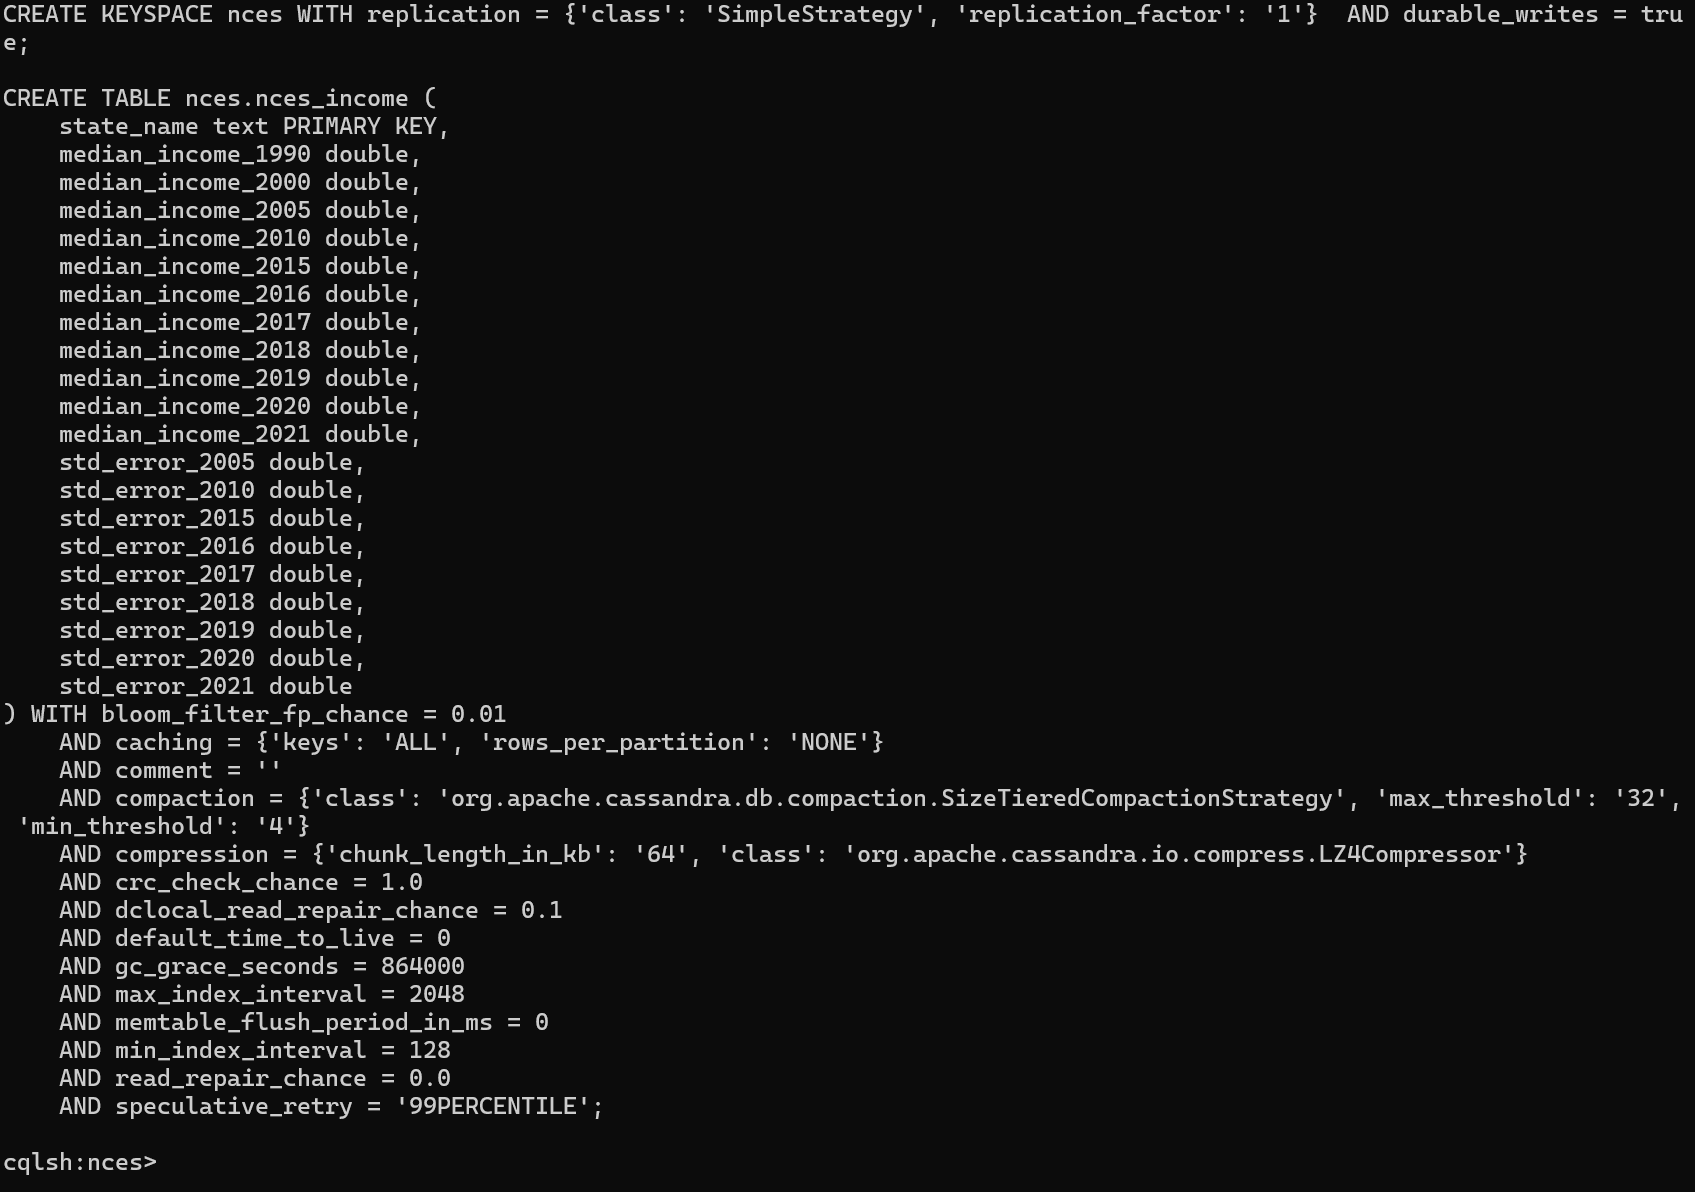

In [28]:
# Write DataFrame to Cassandra
nces_df.write \
    .format("org.apache.spark.sql.cassandra") \
    .mode("append") \
    .options(table="nces_income", keyspace="nces") \
    .save()

# read back from Cassandra
df3 =spark.read.format("org.apache.spark.sql.cassandra")\
    .options(table="nces_income", keyspace="nces") \
    .load()
df3.printSchema()

root
 |-- state_name: string (nullable = false)
 |-- median_income_1990: double (nullable = true)
 |-- median_income_2000: double (nullable = true)
 |-- median_income_2005: double (nullable = true)
 |-- median_income_2010: double (nullable = true)
 |-- median_income_2015: double (nullable = true)
 |-- median_income_2016: double (nullable = true)
 |-- median_income_2017: double (nullable = true)
 |-- median_income_2018: double (nullable = true)
 |-- median_income_2019: double (nullable = true)
 |-- median_income_2020: double (nullable = true)
 |-- median_income_2021: double (nullable = true)
 |-- std_error_2005: double (nullable = true)
 |-- std_error_2010: double (nullable = true)
 |-- std_error_2015: double (nullable = true)
 |-- std_error_2016: double (nullable = true)
 |-- std_error_2017: double (nullable = true)
 |-- std_error_2018: double (nullable = true)
 |-- std_error_2019: double (nullable = true)
 |-- std_error_2020: double (nullable = true)
 |-- std_error_2021: double (nulla

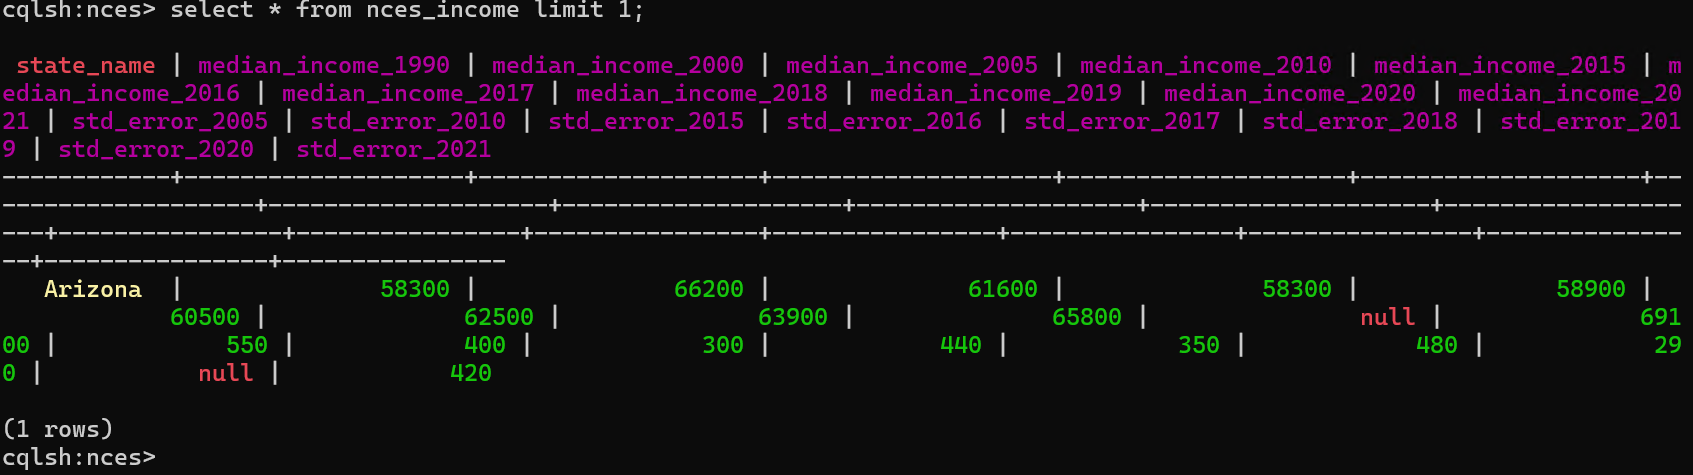

### And save locally.

In [30]:
df3.write.format("json").mode("overwrite").save("/home/jovyan/datasets/nces.json")

#### *Go to Part III to see all 3 datasets saved to Elasticsearch and an example of the 2 dashboards generated.*

In [38]:
from pyspark.sql import SparkSession

# Initialize Spark Session with Cassandra connector
spark = SparkSession.builder \
    .appName("JoinChildcareAndNcesKeyspaces") \
    .config("spark.cassandra.connection.host", "cassandra") \
    .config("spark.cassandra.connection.port", "9042") \
    .config("spark.jars.packages", "com.datastax.spark:spark-cassandra-connector_2.12:3.1.0") \
    .getOrCreate()

# Manually list tables for childcare and nces keyspaces
childcare_tables = ["childcare_prices"]  
nces_tables = ["nces_income"] 

# Helper function to load a table from Cassandra as a Spark DataFrame
def load_table_as_dataframe(keyspace, table):
    return spark.read \
        .format("org.apache.spark.sql.cassandra") \
        .options(keyspace=keyspace, table=table) \
        .load()

# Load and filter tables with "state_name" from childcare keyspace
childcare_dfs = {}
for table in childcare_tables:
    df = load_table_as_dataframe("childcare", table)
    if "state_name" in df.columns:
        childcare_dfs[table] = df

# Load and filter tables with "state_name" from nces keyspace
nces_dfs = {}
for table in nces_tables:
    df = load_table_as_dataframe("nces", table)
    if "state_name" in df.columns:
        nces_dfs[table] = df

# Start joining tables by "state_name"
joined_df = None

# Join all DataFrames from childcare keyspace
for table, df in childcare_dfs.items():
    if joined_df is None:
        joined_df = df
    else:
        joined_df = joined_df.join(df, on="state_name", how="inner")

# Join with DataFrames from nces keyspace
for table, df in nces_dfs.items():
    joined_df = joined_df.join(df, on="state_name", how="inner")

# Show the final joined DataFrame
if joined_df:
     joined_pandas_df = joined_df.toPandas()

# Stop Spark session
spark.stop()


In [44]:
joined_pandas_df[joined_pandas_df['state_name'] == 'New Hampshire']

state_name          county_name  county_fips_code  \
999   New Hampshire       Belknap County             33001   
1000  New Hampshire       Carroll County             33003   
1001  New Hampshire      Cheshire County             33005   
1002  New Hampshire          Coos County             33007   
1003  New Hampshire       Grafton County             33009   
1004  New Hampshire  Hillsborough County             33011   
1005  New Hampshire     Merrimack County             33013   
1006  New Hampshire    Rockingham County             33015   
1007  New Hampshire     Strafford County             33017   
1008  New Hampshire      Sullivan County             33019   

      infant_center_based_price_2018_dollar  \
999                                10860.72   
1000                               10914.80   
1001                               10904.40   
1002                                8698.04   
1003                               11322.48   
1004                               12736.88   
1005                               11683.88   
1006                               13253.76   
1007                               11847.68   
1008                               10393.24   

      infant_center_based_price_2023_estimated_dollar  \
999                                      12783.633842   
1000                                     12847.288822   
1001                                     12835.047480   
1002                                     10238.046695   
1003                                     13327.149443   
1004                                     14991.972006   
1005                                     13752.536091   
1006                                     15600.366722   
1007                                     13945.337233   
1008                                     12233.385502   

      infant_center_based_price_as_share_of_family_income_2018_percent  \
999                                           13.128862                  
1000                                          15.219052                  
1001                                          13.635613                  
1002                                          14.266800                  
1003                                          14.008983                  
1004                                          13.286960                  
1005                                          12.989450                  
1006                                          12.290208                  
1007                                          13.487335                  
1008                                          14.018587                  

      infant_home_based_price_2018_dollar  \
999                               7986.16   
1000                              8025.68   
1001                              8017.88   
1002                              6395.48   
1003                              8325.20   
1004                              9365.20   
1005                              8590.92   
1006                              9745.32   
1007                              8711.56   
1008                              7641.92   

      infant_home_based_price_2023_estimated_dollar  \
999                                     9400.126810   
1000                                    9446.643911   
1001                                    9437.462904   
1002                                    7527.813493   
1003                                    9799.194571   
1004                                   11023.328809   
1005                                   10111.960869   
1006                                   11470.749872   
1007                                   10253.960440   
1008                                    8994.938377   

      infant_home_based_price_as_share_of_family_income_2018_percent  \
999                                            9.653982                
1000                                          11.190608                
1001                                          1

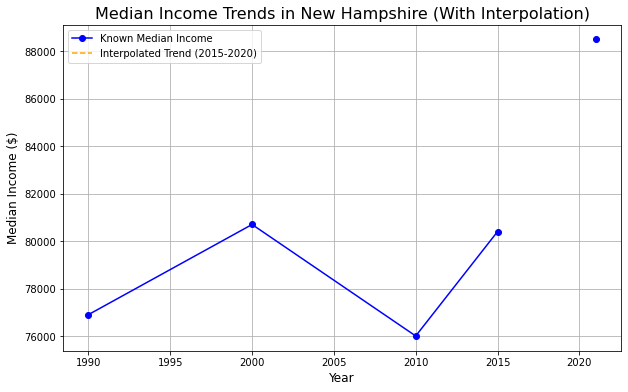

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for rows where state_name is 'New Hampshire'
new_hampshire_data = joined_pandas_df[joined_pandas_df['state_name'] == 'New Hampshire']

# Extract years and median incomes
years = np.array([1990, 2000, 2010, 2015, 2020, 2021])
median_incomes = np.array([
    new_hampshire_data['median_income_1990'].values[0],
    new_hampshire_data['median_income_2000'].values[0],
    new_hampshire_data['median_income_2010'].values[0],
    new_hampshire_data['median_income_2015'].values[0],
    new_hampshire_data['median_income_2020'].values[0],
    new_hampshire_data['median_income_2021'].values[0]
])

# Interpolation
interpolation_years = np.arange(2015, 2021)  # Generate years 2015 through 2020
interpolated_incomes = np.interp(interpolation_years, years, median_incomes)  # Interpolate between 2015 and 2020

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(years, median_incomes, marker='o', label='Known Median Income', linestyle='-', color='blue')
plt.plot(interpolation_years, interpolated_incomes, linestyle='--', label='Interpolated Trend (2015-2020)', color='orange')
plt.title('Median Income Trends in New Hampshire (With Interpolation)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Income ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


#### **Observations**

- **1990 to 2000:**
    - There is a steady increase in median income, indicating economic growth and improved earning capacity in New Hampshire during this decade.
    
- **2000 to 2010:**
    - The median income shows a significant drop, which may align with broader economic trends like the Great Recession (2008). This suggests that households in New Hampshire were impacted by national economic challenges.

- **2010 to 2015:**
    - The median income continues to decline further, albeit at a slower pace compared to the previous decade. This could indicate a delayed recovery from the recession or other economic factors affecting the state.

- **2015 to 2020:**
    - There is a sharp recovery in median income, with income levels rebounding strongly. This might reflect an improving economy, increased job opportunities, and better wages during this period.

- **2020 to 2021:**
    - The income stabilizes or slightly dips, possibly reflecting the economic impact of the COVID-19 pandemic. This suggests some level of stagnation or challenges in maintaining economic growth during this period.

**Observed Growth Pattern (2015 to 2020):** The interpolated median income values between 2015 and 2020 indicate a steady increase in income levels during this period. In 2015, the median income starts at approximately **82,000**, and by 2020, it rises to around **88,000**, reflecting a **6-7% growth over five years**.

**Annual Growth Rate:** Using the interpolated data, the estimated annual growth rate for median income in New Hampshire from 2015 to 2020 is approximately **1.2% per year**.

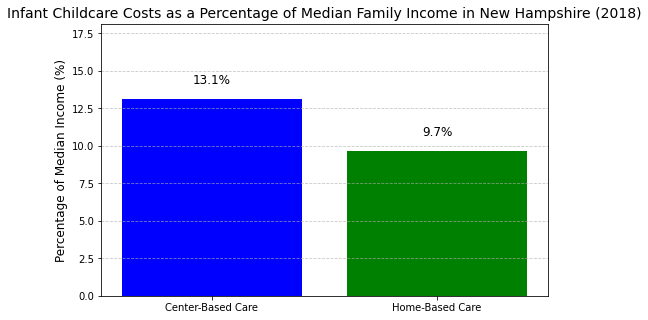

In [51]:
import matplotlib.pyplot as plt

# Extract relevant columns for New Hampshire
new_hampshire_data = joined_pandas_df[joined_pandas_df['state_name'] == 'New Hampshire']

# Extract data for costs and median family income
infant_center_cost = new_hampshire_data['infant_center_based_price_2018_dollar'].values[0]
infant_home_cost = new_hampshire_data['infant_home_based_price_2018_dollar'].values[0]
median_family_income = new_hampshire_data['median_family_income_dollar'].values[0]

# Calculate childcare costs as a percentage of median family income
center_cost_share = (infant_center_cost / median_family_income) * 100
home_cost_share = (infant_home_cost / median_family_income) * 100

# Plot comparison
plt.figure(figsize=(8, 5))
plt.bar(['Center-Based Care', 'Home-Based Care'], [center_cost_share, home_cost_share], color=['blue', 'green'])

# Add labels and titles
plt.title('Infant Childcare Costs as a Percentage of Median Family Income in New Hampshire (2018)', fontsize=14)
plt.ylabel('Percentage of Median Income (%)', fontsize=12)
plt.ylim(0, __builtins__.max([center_cost_share, home_cost_share]) + 5)  # Explicitly use Python's built-in max
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
plt.text(0, center_cost_share + 1, f'{center_cost_share:.1f}%', ha='center', fontsize=12)
plt.text(1, home_cost_share + 1, f'{home_cost_share:.1f}%', ha='center', fontsize=12)

plt.show()


**Observations**

The bar graph illustrates Infant Childcare Costs as a Percentage of Median Family Income in New Hampshire for the year 2018, broken down into:

- Center-Based Care: Costs account for 13.1% of the median family income.
- Home-Based Care: Costs account for 9.7% of the median family income.

This comparison reveals that Center-Based Care is significantly more expensive, consuming a larger share of household income compared to Home-Based Care.

**Income Growth vs. Childcare Costs:**

Between 2015 and 2020, median income showed consistent growth, indicating improved financial capacity for families.
However, childcare costs in 2018 remain substantial, suggesting that income growth has not fully offset the high costs of childcare.

**Trend Alignment:**

While median incomes are on an upward trajectory, the percentage of income spent on childcare demonstrates a gap between income growth and rising childcare expenses.
If childcare costs continue to rise faster than income, this trend may become unsustainable for many families.

**Insights**

Center-Based Care is notably more expensive than Home-Based Care, requiring a larger share of household income.
Despite the upward trend in income levels between 2015 and 2020, childcare costs remain a significant financial burden for families in New Hampshire.
To address this issue, policymakers and stakeholders should consider strategies to reduce childcare costs or align them more closely with income growth to enhance affordability for families.